# Working with Geospatial in Python

- https://campus.datacamp.com/courses/working-with-geospatial-data-in-python

https://campus.datacamp.com/courses/visualizing-geospatial-data-in-python/geoseries-and-folium?ex=5
https://gis.stackexchange.com/questions/293310/how-to-use-geoseries-distance-to-get-the-right-answer
https://stackoverflow.com/questions/57378829/setting-right-projection-crs-to-geodataframe-to-calculate-in-meters


In [1]:
import data_manipulation as dm
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point, Polygon

pd.options.display.max_columns = 100

## C1

In [2]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("data/paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, crs={"init": "epsg:3857"}, geometry=geopandas.points_from_xy(df.x, df.y))

# Inspect the first rows of the restaurants GeoDataFrame
restaurants.head()

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (259641.692 6251867.063)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (259572.340 6252029.683)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (259684.438 6252203.137)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (259597.943 6252230.044)


,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


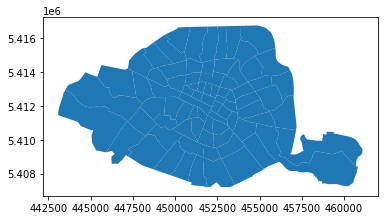

In [3]:
# Read the Paris districts dataset
districts = geopandas.read_file("data/paris_districts_utm.geojson")

# Inspect the first rows
display(districts.head())

# Make a quick visualization of the districts
districts.plot()
plt.show()

In [4]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby("type").size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


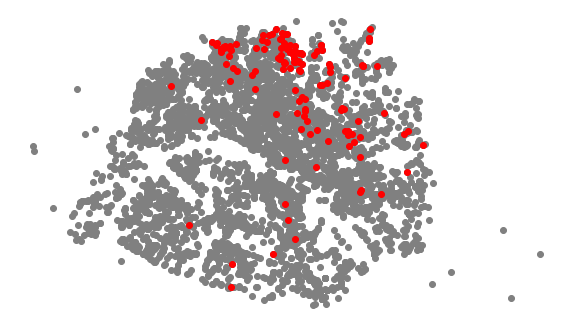

In [5]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants["type"] == "African restaurant"]

# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color="grey")
african_restaurants.plot(ax=ax, color="red")

# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

In [6]:
# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts.geometry))

# Inspect the first rows of the geometry
print(districts.geometry.head())

# Inspect the area of the districts
print(districts.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((451922.133 5411438.484, 451922.080 5...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
3    POLYGON ((451004.908 5412654.095, 450960.640 5...
4    POLYGON ((451328.752 5412991.278, 451294.721 5...
Name: geometry, dtype: geometry
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


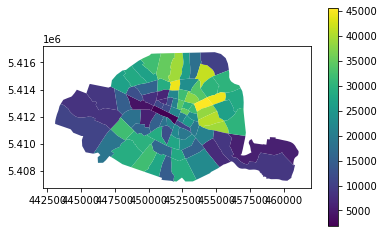

In [7]:
# Inspect the first rows of the districts dataset
display(districts.head())

# Inspect the area of the districts
print(districts.geometry.area)

# Add a population density column
# Add a column "population_density" representing the number of inhabitants per squared kilometer 
# (Note: The area is given in squared meter, so you will need to multiply the result with 10**6).
districts["population_density"] = districts["population"] / districts.geometry.area * 10**6

# Make a plot of the districts colored by the population density
districts.plot(column="population_density", legend=True)
plt.show()

In [8]:
"""https://github.com/johan/world.geo.json/blob/master/countries.geo.json"""
countries = gpd.read_file("data/countries.geo.json")
countries.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [9]:
countries = gpd.read_file("data/ne_10m_admin_0_countries.shp")
countries.info()
countries.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   featurecla  255 non-null    object  
 1   scalerank   255 non-null    int64   
 2   LABELRANK   255 non-null    int64   
 3   SOVEREIGNT  255 non-null    object  
 4   SOV_A3      255 non-null    object  
 5   ADM0_DIF    255 non-null    int64   
 6   LEVEL       255 non-null    int64   
 7   TYPE        255 non-null    object  
 8   ADMIN       255 non-null    object  
 9   ADM0_A3     255 non-null    object  
 10  GEOU_DIF    255 non-null    int64   
 11  GEOUNIT     255 non-null    object  
 12  GU_A3       255 non-null    object  
 13  SU_DIF      255 non-null    int64   
 14  SUBUNIT     255 non-null    object  
 15  SU_A3       255 non-null    object  
 16  BRK_DIFF    255 non-null    int64   
 17  NAME        255 non-null    object  
 18  NAME_LONG   255 non-null    object  
 19  

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,None,Chile,CL,Republic of Chile,None,Chile,None,None,Chile,None,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,Bolivia,None,None,Bolivia,None,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,None,Peru,PE,Republic of Peru,None,Peru,None,None,Peru,None,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South America,Americas,South America,Latin A

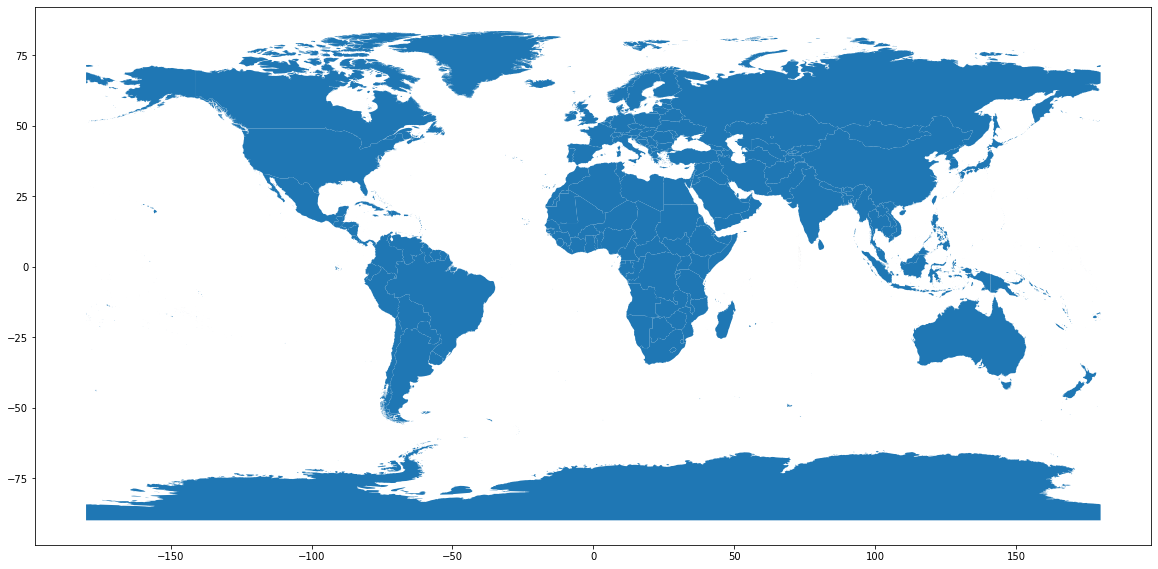

In [11]:
# plt.figure(figsize=(20,10))
countries.plot(figsize=(20,10))
plt.show()

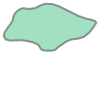

In [12]:
countries.loc[227, "geometry"]

In [13]:
print(countries.loc[227, "geometry"])

POLYGON ((103.9607853520001 1.391099351000094, 103.9856876960001 1.385443427000041, 103.999522332 1.38031647300005, 104.003428582 1.374172268000052, 103.991872592 1.35492584800005, 103.9748641290001 1.334458726000094, 103.954356316 1.318101304000038, 103.9318953790001 1.311468817000048, 103.907237175 1.308742580000057, 103.887705925 1.301255601000094, 103.852712436 1.277289130000042, 103.846934441 1.271918036000045, 103.8440861340001 1.268500067000048, 103.8388778 1.26626211100006, 103.8260197270001 1.26430898600006, 103.8016056650001 1.264797268000052, 103.789561394 1.26788971600007, 103.784434441 1.273871161000045, 103.775889519 1.287583726000094, 103.755137566 1.297105210000041, 103.730153842 1.302923895000049, 103.708750847 1.305243231000077, 103.665293816 1.304103908000059, 103.647634311 1.308417059000078, 103.640391472 1.322251695000091, 103.6447046230001 1.338039455000057, 103.67457116 1.38031647300005, 103.678884311 1.399237372000073, 103.6838485040001 1.409898179000038, 103.69

In [14]:
countries.geometry.area.loc[226:230]

226    0.004016
227    0.041485
228    0.003811
229    0.016506
230    0.052102
dtype: float64

In [15]:
# dm.pandas.print_dataframe_overview(countries)

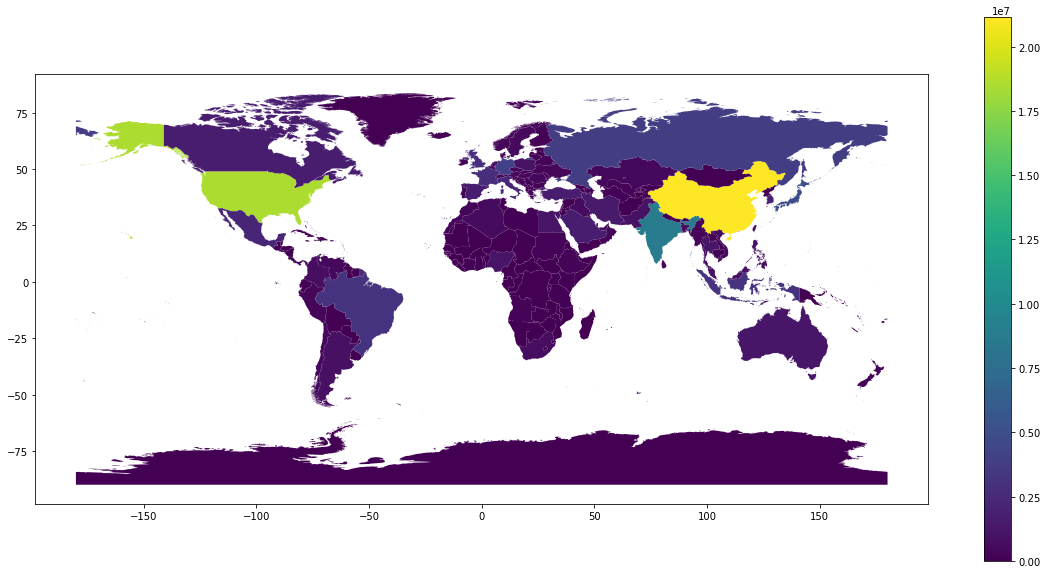

In [16]:
countries.plot(column="GDP_MD_EST", figsize=(20,10), legend=True)
plt.show()

## C2. Shapely geometries and spatial relationships

In [17]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Print the result
print(eiffel_tower)

POINT (255422.6 6250868.9)


In [18]:
districts.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 0°E to 6°E - by country
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, "geometry"]
resto = restaurants.loc[956, "geometry"]

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto))

False
False
4431.459825586486


In [20]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(districts[mask])

0    False
1    False
2    False
3    False
4    False
dtype: bool
Empty GeoDataFrame
Columns: [id, district_name, population, geometry, population_density]
Index: []


460.69760282781715


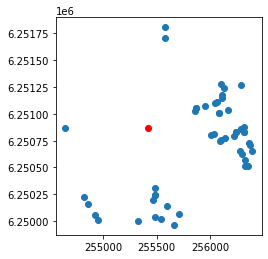

In [21]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km
restaurants_eiffel = restaurants[dist_eiffel < 1000]

# Make a plot of the close-by restaurants
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color="red")
plt.show()

In [22]:
stations = gpd.read_file("data/paris_sharing_bike_stations_utm.geojson")
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (450804.449 5409797.268)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (456414.352 5410698.461)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (456366.909 5411563.320)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (458730.707 5411789.995)
4,43006 - MINIMES (VINCENNES),28,27,POINT (458234.930 5409991.067)


In [23]:
stations.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 0°E to 6°E - by country
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# Join the districts and stations datasets
joined = geopandas.sjoin(stations, districts, op="within")

# Inspect the first five rows of the result
joined.head()

,name,bike_stands,available_bikes,geometry,index_right,id,district_name,population,population_density
0,14002 - RASPAIL QUINET,44,4,POINT (450804.449 5409797.268),52,53,Montparnasse,18570,16497.225232
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (451419.447 5409421.529),52,53,Montparnasse,18570,16497.225232
293,14033 - DAGUERRE GASSENDI,38,1,POINT (450708.228 5409406.941),52,53,Montparnasse,18570,16497.225232
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (451340.026 5409124.575),52,53,Montparnasse,18570,16497.225232
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (451274.511 5409609.731),52,53,Montparnasse,18570,16497.225232


In [25]:
trees = gpd.read_file("data/paris_trees_small.gpkg")
trees.head()

,species,location_type,geometry
0,Marronnier,Alignement,POINT (455834.122 5410780.606)
1,Marronnier,Alignement,POINT (446546.284 5412574.697)
2,Marronnier,Alignement,POINT (449768.283 5409876.557)
3,Marronnier,Alignement,POINT (451779.708 5409292.071)
4,Sophora,Alignement,POINT (447041.361 5409756.712)


In [26]:
trees_by_district = gpd.read_file("data/_chapter2-trees_by_district.csv")
trees_by_district.drop(columns=["geometry"], inplace=True)
trees_by_district["n_trees"] = trees_by_district["n_trees"].astype(int)
trees_by_district.head()

,district_name,n_trees
0,Amérique,728
1,Archives,34
2,Arsenal,213
3,Arts-et-Metiers,79
4,Auteuil,1474


In [27]:
# Print the first rows of the result of the previous exercise
display(trees_by_district.head())

# Merge the "districts" and "trees_by_district" dataframes
districts_trees = pd.merge(districts, trees_by_district, on="district_name")

# Inspect the result
districts_trees.head()

,district_name,n_trees
0,Amérique,728
1,Archives,34
2,Arsenal,213
3,Arts-et-Metiers,79
4,Auteuil,1474


,id,district_name,population,geometry,population_density,n_trees
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",1925.074371,152
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",21793.281432,149
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",11679.793285,6
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",11302.915113,17
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7157.691434,18


In [28]:
districts_trees["n_trees_per_area"] = districts_trees["n_trees"] / districts_trees["geometry"].area * 10000
districts_trees.head()

,id,district_name,population,geometry,population_density,n_trees,n_trees_per_area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",1925.074371,152,1.750068
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",21793.281432,149,3.614424
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",11679.793285,6,0.219339
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",11302.915113,17,0.631240
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7157.691434,18,0.957907


,id,district_name,population,geometry,population_density,n_trees,n_trees_per_area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",1925.074371,152,1.750068
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",21793.281432,149,3.614424
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",11679.793285,6,0.219339
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",11302.915113,17,0.631240
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7157.691434,18,0.957907


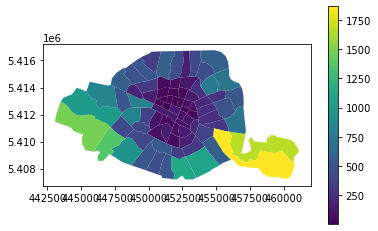

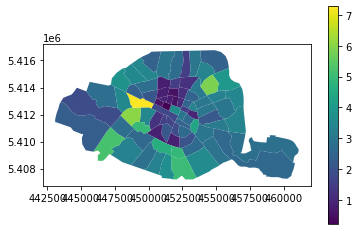

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


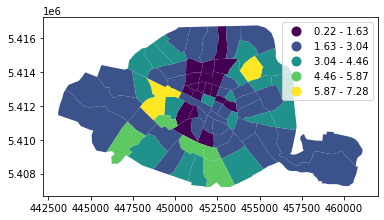

In [29]:
# Print the first rows of the tree density dataset
display(districts_trees.head())

# Make a choropleth of the number of trees 
districts_trees.plot(column="n_trees", legend=True)
plt.show()

# Make a choropleth of the number of trees per area
districts_trees.plot(column="n_trees_per_area", legend=True)
plt.show()
                     
# Make a choropleth of the number of trees 
districts_trees.plot(column="n_trees_per_area", scheme="equal_interval", legend=True)
plt.show()

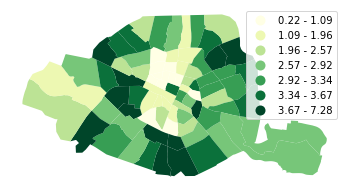

In [30]:
# Generate the choropleth and store the axis
ax = districts_trees.plot(column="n_trees_per_area", scheme="quantiles",
                          k=7, cmap="YlGn", legend=True)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()

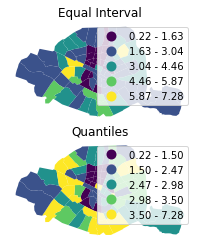

In [31]:
# Set up figure and subplots
fig, axes = plt.subplots(nrows=2)

# Plot equal interval map
districts_trees.plot(column="n_trees_per_area", scheme="equal_interval", k=5, legend=True, ax=axes[0])
axes[0].set_title("Equal Interval")
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column="n_trees_per_area", scheme="quantiles", k=5, legend=True, ax=axes[1])
axes[1].set_title("Quantiles")
axes[1].set_axis_off()

# Display maps
plt.show()

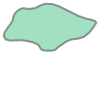

In [32]:
singapore = countries.loc[countries["SOVEREIGNT"]=="Singapore", "geometry"].squeeze()
singapore

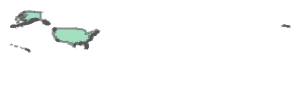

In [33]:
america = countries.loc[(countries["SOVEREIGNT"]=="United States of America") & (countries["TYPE"]=="Country"), "geometry"].squeeze()
america

In [34]:
singapore.distance(america)

85.70919087681216

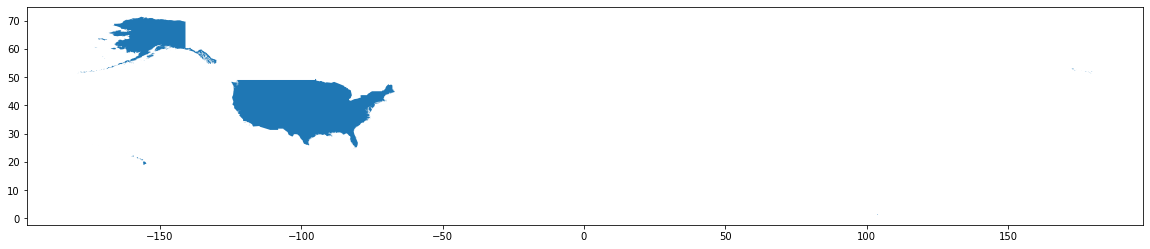

In [35]:
gpd.GeoSeries([singapore, america]).plot(figsize=(20,10))

In [36]:
cities = gpd.read_file("data/ne_110m_populated_places.shp")
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_ADM0,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,None,1.0,0,Vatican (Holy Sea),VAT,Vatican (Holy See),VAT,Lazio,VA,None,41.900012,12.447808,4.0,0,Changed scale rank.,832,832,562430,2,2,6691831.0,None,Vatican City,1,0,636762.0,636762.0,0.0,0.0,0.0,20.0,177.0,177.0,68.0,68.0,160.0,160.0,99.0,99.0,12.333333,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,None,0.0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.917150,12.466670,0.0,0,None,29579,29000,0,7,7,3168070.0,None,San Marino,1,5,29088.0,29579.0,0.0,0.0,0.0,20.0,30.0,30.0,11.0,11.0,63.0,63.0,39.0,39.0,12.391667,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Ville de Saint-Marin,San Marino,Сан-Марино,聖馬力諾,None,سان مارينو المدينة,সান মারিনো,Άγιος Μαρίνος,सानमारिनो,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,None,0.0,0,Liechtenstein,LIE,Liechtenstein,LIE,None,LI,None,47.133724,9.516669,0.0,0,None,36281,5342,33009,7,5,3042030.0,None,Vaduz,1,0,45442.0,45442.0,0.0,0.0,0.0,20.0,45.0,45.0,17.0,17.0,90.0,90.0,56.0,56.0,9.433333,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.7,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都茲,None,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,Legislative and,0.0,0,Swaziland,SWZ,Swaziland,SWZ,Manzini,SZ,None,-26.466667,31.199997,4.0,0,Changed scale rank.,9782,4557,0,5,4,935048.0,None,Lobamba,1,5,9782.0,9782.0,9782.0,0.0,0.0,50.0,18.0,18.0,7.0,7.0,32.0,32.0,20.0,20.0,31.183333,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q101418,421199783,1,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,Лобамба,洛班巴,None,لوبامبا,None,Λομπάμπα,None,Lobamba,Lobamba,Lobamba,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,None,0.0,0,Luxembourg,LUX,Luxembourg,LUX,Luxembourg,LU,None,49.611660,6.130003,4.0,0,Changed scale rank.,107260,76684,106219,9,8,2960316.0,None,Luxembourg,1,0,107260.0,107260.0,107260.0,0.0,0.0,50.0,60.0,60.0,23.0,23.0,71.0,71.0,44.0,44.0,6.041667,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q1842,101751765,0,Luxembourg,Luxemburg,Luxemburgo,Luxembourg,Luxemburgo,Люксембург,盧森堡,None,مدينة لوكسمبورغ,লুক্সেমবুর্গ,Λουξεμβούργο,लक्ज़मबर्ग,Luxembourg,Luksemburg,Lussembu

In [37]:
brussels = cities.loc[170, 'geometry']
paris = cities.loc[235, 'geometry']
belgium = countries.loc[countries["NAME"]=="Belgium", "geometry"].squeeze()
france = countries.loc[countries["NAME"]=="France", "geometry"].squeeze()
uk = countries.loc[countries["NAME"]=="United Kingdom", "geometry"].squeeze()

In [38]:
belgium.area

3.8973508326879465

In [39]:
brussels.distance(paris)

2.8049127723186214

In [40]:
p = Point(1, 2)

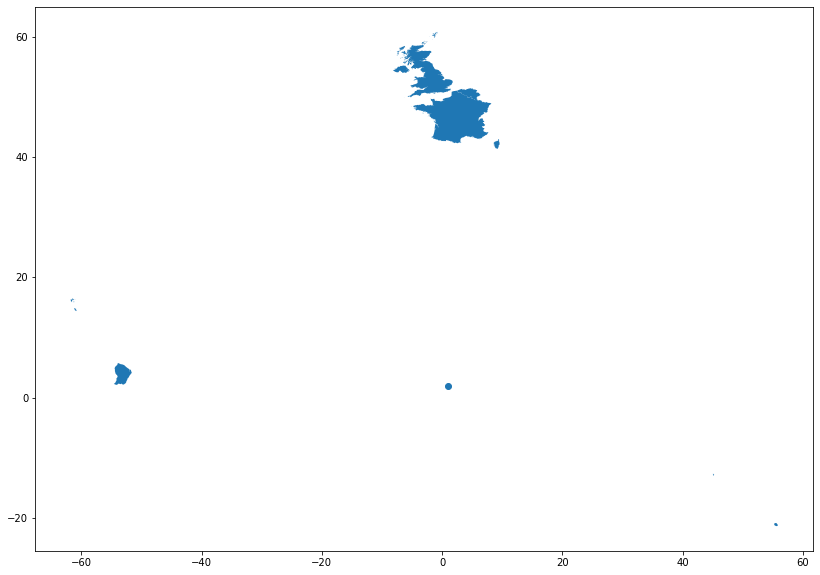

In [41]:
ax = gpd.GeoSeries([belgium, france, uk, paris,  brussels, p]).plot(figsize=(20,10))
plt.show()

In [42]:
belgium.contains(brussels)

True

In [43]:
brussels.within(belgium)

True

In [44]:
france.contains(brussels)

False

In [45]:
belgium.touches(france)

True

In [46]:
cities[cities.within(france)]

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_ADM0,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
235,0,600,3,Admin-0 capital,Paris,None,None,0,Paris,1.0,None,1.0,1,French Republic,FRA,France,FRA,Île-de-France,FR,None,48.866693,2.333335,0.0,0,None,9904000,11177,7142744,13,6,2988507.0,Paris,Paris,1,0,7454172.0,7970513.0,9960588.0,9960588.0,9960588.0,300.0,1121.0,2415.0,433.0,932.0,542.0,1891.0,337.0,1175.0,1.658333,...,France,48.88,2.43,6522.0,6796.0,7411.0,7968.0,8350.0,8558.0,8669.0,8956.0,9330.0,9510.0,9692.0,9852.0,9904.0,9958.0,10007.0,10031.0,10036.0,None,1.7,Q90,101751119,0,Paris,Paris,París,Paris,Paris,Париж,巴黎,None,باريس,প্যারিস,Παρίσι,पैरिस,Párizs,Paris,Parigi,パリ,파리,Parijs,Paryż,Paris,Paris,Paris,4,1159151613,POINT (2.33139 48.86864)


In [47]:
rivers = gpd.read_file("data/ne_50m_rivers_lake_centerlines_scale_rank.shp")
rivers.head()

,scalerank,featurecla,name,dissolve,note,min_zoom,strokeweig,name_alt,name_en,min_label,ne_id,label,wikidataid,name_ar,name_bn,name_de,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,geometry
0,5,River,None,River_untitled_77,_untitled_77,4.7,0.20,None,None,5.7,1159113739,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,"LINESTRING (-72.99133 46.17744, -73.07856 46.1..."
1,5,River,Ebro,RiverEbro,None,4.7,0.15,None,Ebro,5.7,1159112595,Ebro,Q10965,أبرة,None,Ebro,Ebro,Èbre,Έβρος,None,Ebro,Ebro,Ebro,エブロ川,에브로 강,Ebro,Ebro,Rio Ebro,Эбро,Ebro,Ebro,Ebro,埃布羅河,4,"LINESTRING (-4.18886 43.01117, -4.10225 43.001..."
2,5,River,Ebro,RiverEbro,None,4.7,0.20,None,Ebro,5.7,1159112595,Ebro,Q10965,أبرة,None,Ebro,Ebro,Èbre,Έβρος,None,Ebro,Ebro,Ebro,エブロ川,에브로 강,Ebro,Ebro,Rio Ebro,Эбро,Ebro,Ebro,Ebro,埃布羅河,4,"LINESTRING (-1.74761 42.23592, -1.99442 42.390..."
3,5,River,Ebro,RiverEbro,None,4.7,0.25,None,Ebro,5.7,1159112595,Ebro,Q10965,أبرة,None,Ebro,Ebro,Èbre,Έβρος,None,Ebro,Ebro,Ebro,エブロ川,에브로 강,Ebro,Ebro,Rio Ebro,Эбро,Ebro,Ebro,Ebro,埃布羅河,4,"LINESTRING (-1.74761 42.23592, -1.40521 41.978..."
4,5,River,Ebro,RiverEbro,None,4.7,0.30,None,Ebro,5.7,1159112595,Ebro,Q10965,أبرة,None,Ebro,Ebro,Èbre,Έβρος,None,Ebro,Ebro,Ebro,エブロ川,에브로 강,Ebro,Ebro,Rio Ebro,Эбро,Ebro,Ebro,Ebro,埃布羅河,4,"LINESTRING (0.39502 41.25430, 0.52543 41.24890..."


In [48]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()
amazon

896    LINESTRING (-72.47585 -3.48103, -72.74679 -3.4...
897    LINESTRING (-70.90047 -3.96007, -71.05793 -3.9...
898    LINESTRING (-70.90047 -3.96007, -70.55737 -3.8...
899    LINESTRING (-65.76097 -2.60299, -65.90057 -2.4...
900    LINESTRING (-64.57561 -3.39819, -64.79028 -3.2...
901    LINESTRING (-63.17728 -4.03515, -63.21634 -3.9...
902    LINESTRING (-58.68905 -3.34233, -58.80511 -3.3...
903    LINESTRING (-59.92450 -3.20595, -59.95750 -3.2...
904    LINESTRING (-54.52512 -2.44032, -54.56413 -2.4...
905    LINESTRING (-52.66417 -1.55179, -52.87361 -1.6...
906    LINESTRING (-55.51485 -1.94949, -55.55482 -1.9...
907    LINESTRING (-58.31592 -3.21184, -58.38015 -3.2...
Name: geometry, dtype: geometry

In [49]:
mask = countries.intersects(amazon)

In [50]:
countries[mask]

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/geopandas/geodataframe.py:576: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry


In [51]:
joined = gpd.sjoin(cities, countries[['NAME', 'geometry']], op="within")
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 243 entries, 0 to 242
Columns: 122 entries, SCALERANK to NAME_right
dtypes: float64(54), geometry(1), int64(20), object(47)
memory usage: 233.5+ KB


In [52]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_ADM0,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,None,1.0,0,Vatican (Holy Sea),VAT,Vatican (Holy See),VAT,Lazio,VA,None,41.900012,12.447808,4.0,0,Changed scale rank.,832,832,562430,2,2,6691831.0,None,Vatican City,1,0,636762.0,636762.0,0.0,0.0,0.0,20.0,177.0,177.0,68.0,68.0,160.0,160.0,99.0,99.0,12.333333,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,None,0.0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.917150,12.466670,0.0,0,None,29579,29000,0,7,7,3168070.0,None,San Marino,1,5,29088.0,29579.0,0.0,0.0,0.0,20.0,30.0,30.0,11.0,11.0,63.0,63.0,39.0,39.0,12.391667,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Ville de Saint-Marin,San Marino,Сан-Марино,聖馬力諾,None,سان مارينو المدينة,সান মারিনো,Άγιος Μαρίνος,सानमारिनो,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,None,0.0,0,Liechtenstein,LIE,Liechtenstein,LIE,None,LI,None,47.133724,9.516669,0.0,0,None,36281,5342,33009,7,5,3042030.0,None,Vaduz,1,0,45442.0,45442.0,0.0,0.0,0.0,20.0,45.0,45.0,17.0,17.0,90.0,90.0,56.0,56.0,9.433333,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.7,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都茲,None,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,Legislative and,0.0,0,Swaziland,SWZ,Swaziland,SWZ,Manzini,SZ,None,-26.466667,31.199997,4.0,0,Changed scale rank.,9782,4557,0,5,4,935048.0,None,Lobamba,1,5,9782.0,9782.0,9782.0,0.0,0.0,50.0,18.0,18.0,7.0,7.0,32.0,32.0,20.0,20.0,31.183333,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q101418,421199783,1,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,Лобамба,洛班巴,None,لوبامبا,None,Λομπάμπα,None,Lobamba,Lobamba,Lobamba,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,None,0.0,0,Luxembourg,LUX,Luxembourg,LUX,Luxembourg,LU,None,49.611660,6.130003,4.0,0,Changed scale rank.,107260,76684,106219,9,8,2960316.0,None,Luxembourg,1,0,107260.0,107260.0,107260.0,0.0,0.0,50.0,60.0,60.0,23.0,23.0,71.0,71.0,44.0,44.0,6.041667,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q1842,101751765,0,Luxembourg,Luxemburg,Luxemburgo,Luxembourg,Luxemburgo,Люксембург,盧森堡,None,مدينة لوكسمبورغ,লুক্সেমবুর্গ,Λουξεμβούργο,लक्ज़मबर्ग,Luxembourg,Luksemburg,Lussembu

In [53]:
joined.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME_left,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry,index_right,NAME_right
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,None,1.0,0,Vatican (Holy Sea),VAT,Vatican (Holy See),VAT,Lazio,VA,None,41.900012,12.447808,4.0,0,Changed scale rank.,832,832,562430,2,2,6691831.0,None,Vatican City,1,0,636762.0,636762.0,0.0,0.0,0.0,20.0,177.0,177.0,68.0,68.0,160.0,160.0,99.0,99.0,12.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328),166,Vatican
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,None,0.0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.917150,12.466670,0.0,0,None,29579,29000,0,7,7,3168070.0,None,San Marino,1,5,29088.0,29579.0,0.0,0.0,0.0,20.0,30.0,30.0,11.0,11.0,63.0,63.0,39.0,39.0,12.391667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Ville de Saint-Marin,San Marino,Сан-Марино,聖馬力諾,None,سان مارينو المدينة,সান মারিনো,Άγιος Μαρίνος,सानमारिनो,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610),111,San Marino
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,None,0.0,0,Liechtenstein,LIE,Liechtenstein,LIE,None,LI,None,47.133724,9.516669,0.0,0,None,36281,5342,33009,7,5,3042030.0,None,Vaduz,1,0,45442.0,45442.0,0.0,0.0,0.0,20.0,45.0,45.0,17.0,17.0,90.0,90.0,56.0,56.0,9.433333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.7,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都茲,None,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372),95,Liechtenstein
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,Legislative and,0.0,0,Swaziland,SWZ,Swaziland,SWZ,Manzini,SZ,None,-26.466667,31.199997,4.0,0,Changed scale rank.,9782,4557,0,5,4,935048.0,None,Lobamba,1,5,9782.0,9782.0,9782.0,0.0,0.0,50.0,18.0,18.0,7.0,7.0,32.0,32.0,20.0,20.0,31.183333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q101418,421199783,1,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,Лобамба,洛班巴,None,لوبامبا,None,Λομπάμπα,None,Lobamba,Lobamba,Lobamba,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667),123,eSwatini
16,4,50,8,Admin-0 capital,Mbabane,None,None,0,Mbabane,1.0,Administrative,0.0,0,Swaziland,SWZ,Swaziland,SWZ,Hhohho,SZ,None,-26.316651,31.133335,4.0,0,Changed scale rank.,90138,76218,89979,8,8,934985.0,None,Mbabane,1,0,90138.0,90138.0,90138.0,90138.0,0.0,100.0,28.0,28.0,11.0,11.0,37.0,37.0,23.0,23.0,31.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,5.6,Q3904,421203091,0,Mbabane,Mbabane,Mbabane,Mbabane,Mbabane,Мбабане,墨巴本,None,مبابان,অম্বাবানে,Μπαμπάνε,बाबाने,Mbabane,Mbabane,Mbabane,ムババーネ,음바바네,Mbabane,M

In [54]:
countries.loc[166]

featurecla                                      Admin-0 country
scalerank                                                     0
LABELRANK                                                     6
SOVEREIGNT                                              Vatican
SOV_A3                                                      VAT
                                    ...                        
NAME_SV                                           Vatikanstaten
NAME_TR                                                 Vatikan
NAME_VI                                           Thành Vatican
NAME_ZH                                                     梵蒂冈
geometry      POLYGON ((12.45313691700008 41.90275194100009,...
Name: 166, Length: 95, dtype: object

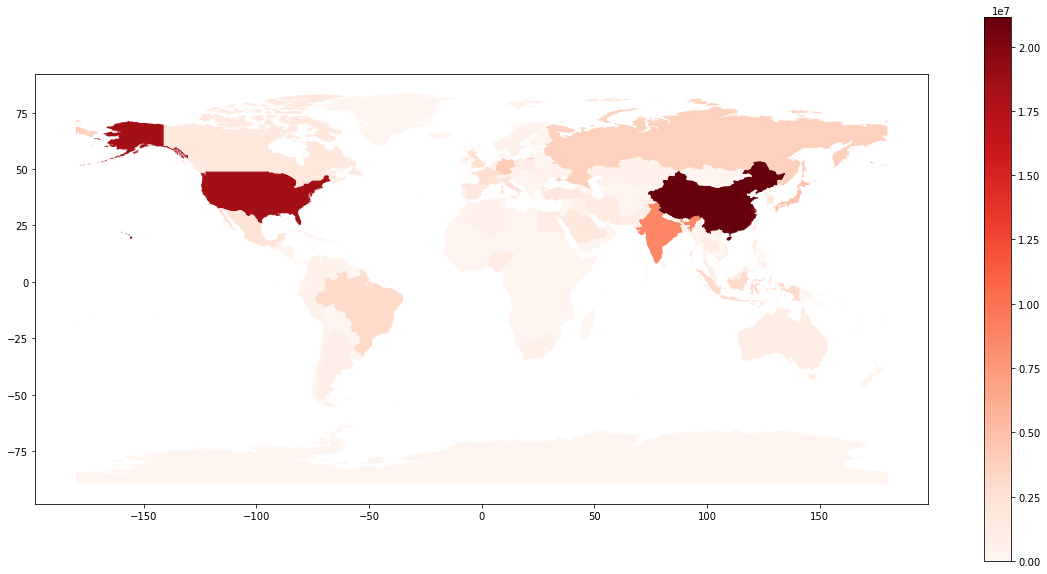

In [55]:
countries.plot(column="GDP_MD_EST", cmap="Reds", figsize=(20,10), legend=True)
plt.show()

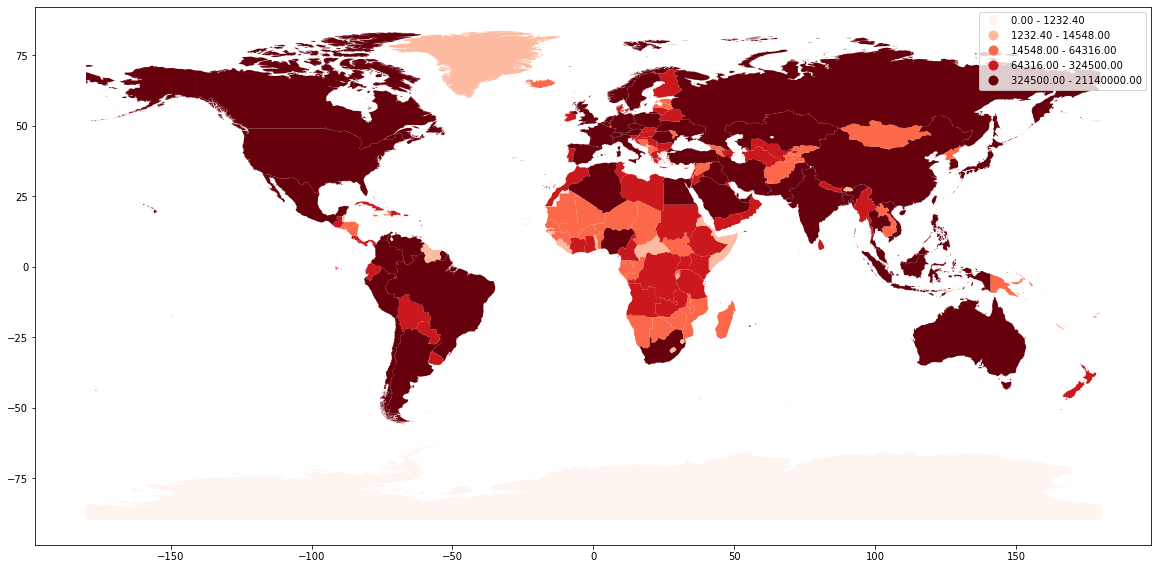

In [56]:
countries.plot(column="GDP_MD_EST", cmap="Reds", scheme="Quantiles", figsize=(20,10), legend=True)
plt.show()

## C3. Coordinate Reference Systems

In [57]:
# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
districts.head()

epsg:32631


,id,district_name,population,geometry,population_density
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",1925.074371
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",21793.281432
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",11679.793285
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",11302.915113
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7157.691434


The standard projected CRS for France is the RGF93 / Lambert-93 reference system (referenced by the EPSG:2154 number).

epsg:32631


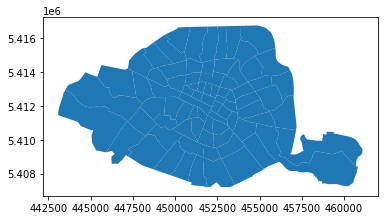

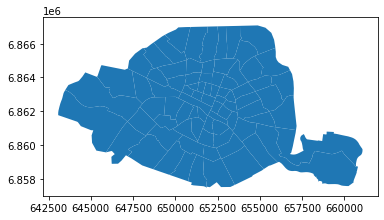

In [58]:
# Print the CRS information
print(districts.crs)

# Plot the districts dataset
districts.plot()
plt.show()

# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=2154)

# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

In [59]:
# Construct a Point object for the Eiffel Tower
eiffel_tower = Point(2.2945, 48.8584)

# Put the point in a GeoSeries with the correct CRS
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={"init": "epsg:4326"})

# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [60]:
restaurants = restaurants.to_crs({"init": "epsg:4326"})
restaurants

/home/anonymous/anaconda3/envs/geo-env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (2.33240 48.86430)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (2.33178 48.86526)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (2.33254 48.86593)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (2.33279 48.86628)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (2.33201 48.86644)
...,...,...,...,...
5730,Asian restaurant,259415.267801,6.253554e+06,POINT (2.33037 48.87427)
5731,European restuarant,259039.341881,6.253967e+06,POINT (2.32699 48.87671)
5732,Asian restaurant,267737.067655,6.251037e+06,POINT (2.40512 48.85939)
5733,Maghrebian restaurant,267811.874353,6.250977e+06,POINT (2.40579 48.85904)


In [61]:
# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]

# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

303.56255387894674


However, typically, your data will not come in Web Mercator (EPSG:3857) and you will have to align them with web tiles on your own.

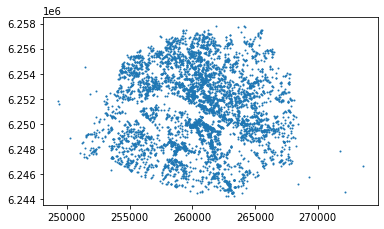

In [62]:
# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize=1)
plt.show()

https://land.copernicus.eu/local/urban-atlas/urban-atlas-2018?tab=download

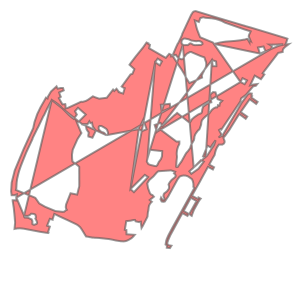

In [63]:
park_boulogne = Polygon([(3751552.803530811, 2890025.351378248),(3751553.399978335, 2890025.259358926),(3751558.948674322, 2890075.140209724),(3751522.057486374, 2890061.48165575),(3751480.984260763, 2890061.979047421),(3751473.142739745, 2890118.829245897),(3751481.636747948, 2890252.361153857),(3751527.976115653, 2890435.475113793),(3751661.602988205, 2890756.547137057),(3751785.326903735, 2891026.670284449),(3751804.304879101, 2891068.104393499),(3751808.452024022, 2891086.874368945),(3751825.026657191, 2891161.891107948),(3751865.206409445, 2891279.087534675),(3751913.001142998, 2891378.262630394),(3751913.001591853, 2891378.263427097),(3751990.106172047, 2891513.870622243),(3751989.569435977, 2891514.168704264),(3751996.234855132, 2891525.99959291),(3752019.430273552, 2891513.463459946),(3752025.310170595, 2891540.730624733),(3752072.277204217, 2891618.399929608),(3752154.857032408, 2891694.937429504),(3752169.863126158, 2891662.010425227),(3752170.522675907, 2891660.563211474),(3752170.522676681, 2891660.563211631),(3752170.52268505, 2891660.563193269),(3752195.309751469, 2891665.628259756),(3752219.278282814, 2891670.526044822),(3752252.441748864, 2891670.010719371),(3752262.661293953, 2891634.534301715),(3752193.840639489, 2891603.495732844),(3752207.13949471, 2891563.609469454),(3752218.411205086, 2891537.919231218),(3752196.406499793, 2891522.564666335),(3752189.93389018, 2891518.048175826),(3752243.685034216, 2891425.110968558),(3752268.529118791, 2891427.201543767),(3752285.748027329, 2891428.650462388),(3752285.748021482, 2891428.650476649),(3752285.748028256, 2891428.650477219),(3752288.668611357, 2891415.547874587),(3752290.950983026, 2891380.251183323),(3752288.908330842, 2891363.284257207),(3752298.276314653, 2891365.774904366),(3752298.276311081, 2891365.774871315),(3752326.519417642, 2891373.283811968),(3752326.519568074, 2891373.283881784),(3752326.519575472, 2891373.283883751),(3752445.668111911, 2891428.581522879),(3752523.714894512, 2891464.803559958),(3752524.436898945, 2891464.734425435),(3752546.09838933, 2891462.66019095),(3752592.467250726, 2891475.512097309),(3752592.46734202, 2891475.512143959),(3752592.467401984, 2891475.512160579),(3752623.159261286, 2891491.195245037),(3752623.159333231, 2891491.19529582),(3752623.159334383, 2891491.195296409),(3752700.050692053, 2891545.469539323),(3752728.299454338, 2891533.6295983),(3752736.405856709, 2891530.231939984),(3752736.406015112, 2891530.231884783),(3752736.406034288, 2891530.231876746),(3752794.301187295, 2891510.056439078),(3752899.698356038, 2891522.968616154),(3752899.698364717, 2891522.968627369),(3752908.607730069, 2891524.060111448),(3753003.266569127, 2891646.980695097),(3753021.014998247, 2891626.018239237),(3753021.015052363, 2891626.01829188),(3753021.015057269, 2891626.018286086),(3753032.725341208, 2891637.40981645),(3753054.625651179, 2891658.713980883),(3753088.866418198, 2891612.87031622),(3753091.160246101, 2891612.213906108),(3753090.631294124, 2891610.507435279),(3753090.631351494, 2891610.507358468),(3753090.125486121, 2891608.875188325),(3753089.690198225, 2891607.470929645),(3753089.690252846, 2891607.47091202),(3753089.690246332, 2891607.470891),(3753154.168749474, 2891586.665233908),(3753177.608267013, 2891666.88896463),(3753177.608240833, 2891666.888970349),(3753177.608586155, 2891666.890152244),(3753167.881872166, 2891669.01400255),(3753167.881823011, 2891669.014034918),(3753167.881779616, 2891669.014044393),(3753132.179637418, 2891692.522578423),(3753264.721461319, 2891874.033333601),(3753274.849509304, 2891877.279454964),(3753293.480784697, 2891883.250902317),(3753322.641682867, 2891953.61694722),(3753305.66346043, 2891968.874110824),(3753249.904471599, 2892018.980910096),(3753262.374436112, 2892037.60572924),(3753341.910413531, 2892142.344901538),(3753451.563584705, 2892277.047783311),(3753505.056265315, 2892352.975443903),(3753533.658660009, 2892339.915548562),(3753531.969707878, 2892330.594330113),(3753556.225709675, 2892318.039146622),(3753556.225707926, 2892318.039138904),(3753556.225703561, 2892318.039140978),(3753555.028621388, 2892312.755564244),(3753544.490269303, 2892266.242494192),(3753794.102967505, 2892122.628064497),(3753831.148329263, 2892166.700763804),(3753844.590067443, 2892182.69232993),(3753844.590072089, 2892182.692327715),(3753844.590073384, 2892182.692329255),(3753844.590063411, 2892182.692334116),(3753844.590068078, 2892182.692339668),(3753875.855405758, 2892167.780875561),(3753876.475524269, 2892153.10298402),(3753879.26695678, 2892153.457667958),(3753875.548435654, 2892144.269562009),(3753900.652776433, 2892146.402856105),(3753988.788105446, 2892008.3399368),(3754033.113131338, 2891943.853653967),(3754070.442123282, 2891880.746952932),(3754102.18521, 2891818.211659922),(3754148.284495566, 2891744.896705979),(3754283.020100238, 2891800.697095659),(3754283.259829915, 2891803.263049316),(3754338.533296713, 2891826.700483473),(3754333.732253409, 2891855.475040058),(3754349.525381756, 2891896.527376309),(3754361.901002545, 2891916.40464943),(3754362.030547624, 2891916.612718789),(3754380.45706181, 2891957.412790728),(3754387.09298271, 2891969.109963563),(3754394.771906657, 2891982.64555707),(3754394.771925705, 2891982.645676956),(3754394.771957485, 2891982.645732975),(3754401.225150095, 2892023.262015984),(3754401.225145295, 2892023.262129784),(3754401.225169868, 2892023.262284446),(3754399.985986373, 2892052.64417719),(3754399.98595099, 2892052.644278811),(3754399.985949559, 2892052.644312744),(3754373.133811938, 2892129.764223447),(3754321.531268314, 2892147.744028489),(3754199.945138923, 2892198.924004105),(3754173.907058192, 2892210.967065314),(3754154.238050366, 2892209.188929352),(3754105.19658626, 2892181.961036017),(3754070.476715805, 2892137.400129098),(3754070.47670135, 2892137.400106626),(3754070.476620437, 2892137.400002777),(3754048.716038063, 2892103.569487327),(3754027.279276362, 2892101.631621089),(3753985.061028934, 2892118.975446906),(3753958.558445373, 2892148.116141941),(3753945.033155565, 2892167.881942786),(3753933.97422951, 2892163.623610499),(3753913.436502163, 2892161.482149203),(3753913.010750975, 2892171.214456676),(3753910.222269438, 2892176.367493545),(3753905.027741526, 2892181.191741264),(3753949.05560994, 2892284.825486989),(3753974.263411412, 2892338.425418599),(3753980.385031093, 2892343.132401366),(3754030.593707215, 2892448.944954615),(3754039.417684069, 2892471.140304774),(3754040.159739989, 2892480.586837821),(3754177.60679353, 2892774.958487326),(3754184.459939156, 2892782.287023677),(3754195.425304279, 2892802.172955015),(3754208.68438931, 2892815.492727962),(3754208.684454442, 2892815.492754267),(3754208.684792019, 2892815.493093394),(3754220.748462062, 2892820.365744733),(3754243.099749018, 2892824.193282961),(3754499.848273147, 2892746.145926878),(3755011.683771624, 2892593.455900528),(3755084.853244245, 2892573.001200003),(3755576.502200392, 2892424.169296032),(3755619.452425861, 2892409.976575761),(3755599.014264347, 2892344.87002679),(3755596.998535727, 2892341.361338434),(3755592.21989291, 2892333.043457919),(3755592.219947714, 2892333.043464713),(3755586.236488176, 2892322.628325195),(3755641.100742113, 2892329.758885064),(3755587.803103577, 2892288.57745679),(3755568.228777426, 2892270.403521689),(3755561.071822485, 2892262.113418965),(3755553.465043852, 2892249.714834185),(3755549.861691462, 2892240.284741406),(3755547.84301023, 2892228.555871998),(3755547.9840392, 2892210.966085656),(3755481.34855023, 2892197.212803289),(3755246.825092157, 2891891.120218014),(3755273.119540534, 2891873.529494998),(3755221.933702589, 2891802.319419129),(3755128.259961467, 2891856.552078551),(3755059.959480228, 2891709.640015798),(3755109.342829743, 2891723.115037269),(3755167.101464263, 2891730.19587708),(3755146.122188566, 2891704.376852779),(3755104.903926931, 2891694.545043323),(3754997.496993198, 2891569.099120475),(3754924.71432045, 2891514.935092099),(3754917.106495023, 2891490.390977293),(3754915.876588419, 2891473.023172447),(3754628.648540076, 2891047.18474265),(3754618.369504903, 2891056.072526988),(3754593.349616834, 2891039.382623682),(3754601.490568423, 2891023.479327139),(3754631.65588286, 2890968.177260002),(3754596.014127091, 2890936.253103653),(3754597.373445451, 2890934.060724883),(3754655.205566712, 2890957.130845224),(3754649.138617352, 2890965.996696695),(3754935.023470788, 2891452.066734661),(3755024.737795324, 2891573.806529604),(3755055.475821645, 2891589.510611102),(3755064.816307022, 2891589.946528682),(3755084.443197514, 2891586.737318196),(3755079.794826213, 2891555.065160656),(3755088.044291682, 2891549.871941704),(3755080.884926648, 2891540.211397887),(3755078.401469664, 2891527.856907035),(3755171.65896273, 2891462.187763927),(3755163.424466789, 2891449.718543733),(3755150.106684543, 2891431.290884765),(3755052.726139712, 2891501.382656308),(3754917.758988086, 2891309.530473036),(3755015.749615755, 2891241.508343039),(3755005.733403869, 2891226.259473949),(3754992.911259373, 2891208.428338147),(3754897.095002511, 2891279.117943079),(3754875.638531606, 2891247.62323808),(3754747.700984926, 2891041.75213015),(3754699.135459381, 2890973.824568044),(3754675.56184408, 2890942.496605144),(3754658.176243785, 2890923.928947187),(3754676.221612173, 2890874.237648551),(3754676.412614436, 2890860.68065685),(3754674.697661544, 2890853.206007966),(3754666.934122606, 2890837.644670057),(3754641.549188584, 2890820.906030606),(3754590.086753154, 2890820.78690035),(3754566.170469455, 2890783.98633077),(3754554.449245354, 2890761.286049439),(3754544.258638796, 2890736.589585965),(3754534.09724453, 2890700.590051265),(3754526.764001208, 2890665.33440171),(3754502.7138774, 2890625.411350326),(3754445.888019808, 2890521.980314989),(3754517.771630662, 2890481.570217762),(3754509.840526462, 2890466.014240335),(3754500.886026876, 2890447.766334208),(3754426.771129032, 2890487.184875412),(3754315.030914002, 2890283.802003263),(3754311.263035862, 2890275.635652031),(3754186.147912234, 2890053.769835958),(3754277.30580126, 2890005.187327784),(3754284.582073882, 2890020.693586724),(3754285.723467787, 2890027.437372027),(3754317.863203903, 2890010.512470034),(3754303.931476078, 2889993.498478632),(3754284.244206503, 2889964.30988642),(3754219.325820143, 2889847.152613126),(3754211.71704679, 2889831.33863212),(3754192.062584436, 2889779.927176425),(3754183.337559904, 2889752.167884558),(3754172.321549415, 2889758.7269265),(3754147.169595534, 2889780.702544692),(3754242.670307053, 2889952.242340012),(3754248.748377582, 2889955.375680286),(3754260.301072091, 2889971.950293231),(3754169.457461745, 2890023.006123084),(3754061.531799669, 2889824.692835121),(3754136.606568727, 2889782.367960043),(3754119.498685713, 2889751.558622378),(3754044.037310944, 2889792.369339119),(3754010.976498659, 2889735.603816921),(3753862.1672596, 2889461.354984139),(3753830.718149045, 2889390.849280607),(3753816.10420522, 2889346.647963691),(3753816.947655609, 2889333.44063022),(3753824.735743128, 2889321.882391026),(3753833.265559471, 2889313.078945244),(3753841.08909413, 2889310.393616688),(3753878.314013036, 2889304.029635468),(3753877.084786385, 2889302.181570947),(3753856.462511112, 2889268.563037266),(3753809.028523634, 2889273.543800194),(3753811.148726488, 2889296.464994908),(3753809.171512652, 2889305.227169881),(3753801.025531949, 2889316.692785132),(3753790.888693922, 2889322.04941596),(3753799.82515998, 2889375.867537127),(3753809.195161927, 2889406.743251942),(3753833.926418063, 2889462.300633783),(3753893.04923986, 2889573.629891792),(3754223.196006867, 2890171.635889163),(3754218.5622339, 2890176.266729996),(3754218.562271587, 2890176.266798126),(3754207.94252378, 2890186.879780324),(3754208.265712644, 2890193.953967329),(3754209.213145668, 2890214.691031503),(3754206.656823921, 2890244.198775271),(3754206.656773427, 2890244.198968985),(3754206.656770268, 2890244.199005445),(3754198.833750536, 2890274.211134601),(3754188.007687594, 2890300.520417447),(3754155.744945307, 2890324.891659445),(3754125.745944952, 2890345.055699229),(3754125.745892706, 2890345.055716209),(3754125.74586784, 2890345.055732923),(3754090.934399259, 2890356.369685932),(3754060.527529715, 2890357.950762179),(3754060.527348763, 2890357.950730891),(3754060.527337887, 2890357.950731456),(3754030.820920737, 2890352.814111799),(3754001.815155939, 2890340.959688597),(3753971.538775658, 2890301.293902237),(3753828.973482797, 2890040.93415334),(3753779.57052101, 2889967.18581432),(3753756.570845571, 2889962.737218529),(3753731.800072302, 2889967.769157146),(3753714.883309112, 2889999.982259553),(3753723.488427713, 2890025.96066178),(3753740.603261866, 2890000.845137998),(3753740.603310357, 2890000.845095859),(3753740.603377842, 2890000.844988497),(3753749.204273161, 2889993.370768683),(3753762.371190215, 2889992.110096118),(3753772.203998197, 2889997.819372089),(3753772.735335284, 2890017.720565053),(3753759.275905921, 2890044.282011145),(3753759.191152339, 2890057.591563529),(3753763.672613303, 2890077.114605428),(3753771.488146664, 2890089.667842951),(3753790.338109917, 2890103.58490911),(3753798.5999596, 2890109.684669994),(3753816.001462104, 2890125.309987854),(3753838.955226057, 2890157.69619639),(3753838.955231014, 2890157.696218824),(3753838.95523292, 2890157.696221514),(3753843.559822012, 2890178.537649563),(3753843.559821975, 2890178.537655334),(3753843.559869169, 2890178.537868944),(3753843.47523186, 2890191.846996448),(3753843.475182019, 2890191.847199251),(3753843.475182003, 2890191.847201643),(3753843.371854362, 2890192.267636683),(3753835.775322534, 2890223.177718739),(3753842.520620397, 2890238.493834058),(3753859.591385468, 2890264.792244629),(3753883.492076906, 2890293.097082666),(3753909.000228856, 2890313.387215931),(3753920.806191398, 2890322.778110177),(3753939.771292979, 2890340.914467484),(3753939.771293726, 2890340.914475483),(3753939.771364089, 2890340.914542771),(3753941.496196828, 2890359.371039323),(3753941.496142979, 2890359.37114873),(3753941.49615439, 2890359.371270839),(3753932.56425298, 2890377.518385556),(3753916.997396823, 2890388.34615622),(3753934.318804881, 2890413.9783347),(3753871.683119683, 2890434.425744962),(3753681.961530224, 2890421.161146928),(3753673.85563605, 2890414.589185272),(3753673.855553625, 2890414.589179499),(3753673.855550212, 2890414.589176733),(3753673.85556836, 2890414.589178003),(3753659.552980482, 2890402.993129476),(3753623.318769939, 2890360.815613518),(3753619.238920158, 2890356.066565125),(3753608.871558663, 2890343.998701119),(3753603.230588875, 2890339.112038659),(3753545.269807731, 2890288.901754932),(3753515.324586218, 2890238.563062686),(3753528.42190218, 2890165.481326863),(3753528.421936514, 2890165.481234161),(3753528.421949356, 2890165.481162506),(3753556.002879294, 2890091.012656496),(3753574.028369607, 2890070.664743427),(3753574.028396375, 2890070.664735353),(3753574.028497925, 2890070.664620719),(3753593.409130113, 2890064.818498367),(3753611.513388738, 2890043.407001568),(3753615.476574265, 2890038.719834226),(3753615.476586598, 2890038.719843862),(3753615.476589522, 2890038.719840402),(3753553.379591818, 2889990.202450712),(3753584.405780877, 2889963.108586838),(3753581.487287277, 2889960.918862219),(3753576.723332372, 2889957.344584124),(3753576.723184501, 2889957.344390394),(3753576.723157107, 2889957.344369841),(3753554.015984614, 2889927.595106322),(3753542.581476511, 2889904.747274062),(3753542.5814488, 2889904.747128446),(3753542.581353735, 2889904.746938492),(3753537.360964004, 2889877.314587897),(3753532.223137646, 2889835.311032233),(3753531.732273657, 2889831.298065039),(3753531.331289719, 2889829.574716319),(3753525.071840503, 2889802.673107183),(3753525.071801314, 2889802.67268782),(3753525.071767905, 2889802.672544236),(3753519.158226644, 2889739.391885157),(3753445.985755182, 2889596.091589168),(3753430.256658249, 2889571.096410756),(3753430.25666501, 2889571.096366542),(3753430.256650605, 2889571.096343651),(3753420.161909668, 2889641.873746102),(3753420.695018563, 2889664.415634848),(3753399.944749335, 2889662.286978536),(3753392.396565367, 2889658.540525075),(3753341.297333499, 2889669.962082736),(3753338.345766425, 2889676.132358311),(3753331.295067044, 2889690.871943761),(3753331.295048709, 2889690.871942476),(3753331.295047438, 2889690.871945133),(3753307.225305672, 2889689.186220653),(3753307.225287535, 2889689.186216636),(3753307.225118291, 2889689.186204783),(3753261.102626526, 2889678.970799987),(3753200.742771537, 2889672.778778887),(3753200.742767962, 2889672.778757247),(3753200.742756184, 2889672.778756038),(3753179.329311684, 2889543.144787148),(3753179.329322978, 2889543.144785429),(3753179.329317982, 2889543.14475518),(3753201.802727429, 2889539.72515605),(3753202.906570113, 2889539.557191607),(3753204.893256773, 2889475.519994609),(3753204.89327226, 2889475.519993563),(3753204.893272417, 2889475.519988508),(3753327.807910705, 2889467.223619144),(3753306.213630947, 2889441.731884854),(3753285.509061226, 2889422.602321706),(3753270.085126577, 2889411.25849461),(3753239.571666564, 2889393.287969107),(3753211.976962119, 2889379.975385617),(3753195.19460836, 2889374.019524159),(3753164.67462875, 2889368.979282045),(3753119.63473554, 2889371.226525315),(3753040.045997479, 2889383.353650753),(3752989.385978195, 2889395.159312058),(3752939.759573484, 2889404.202443814),(3752775.936190201, 2889421.84629899),(3752732.854802411, 2889423.100450742),(3752699.925799255, 2889426.588101672),(3752690.280368082, 2889425.345383445),(3752673.670141746, 2889429.942924768),(3752652.961398186, 2889432.628603696),(3752628.193885, 2889438.605847665),(3752597.357067747, 2889442.624675664),(3752537.201087736, 2889541.906135768),(3752516.099538496, 2889572.583470991),(3752507.812690999, 2889582.819918679),(3752495.405914015, 2889594.228281456),(3752478.18812009, 2889608.485287909),(3752453.967797803, 2889624.223056471),(3752316.659805089, 2889689.651339066),(3752197.866973207, 2889744.118934358),(3752121.677771104, 2889781.64568893),(3752095.538183616, 2889699.637117883),(3752095.254035207, 2889694.505071453),(3752095.253984817, 2889694.505088021),(3752095.253983382, 2889694.505062098),(3752090.755204915, 2889695.984238419),(3752054.443887276, 2889707.923227832),(3752054.443885134, 2889707.923222485),(3752054.443883788, 2889707.923222927),(3752012.864376755, 2889604.162678268),(3752012.864378104, 2889604.162677834),(3752012.86437681, 2889604.162674605),(3752026.916931404, 2889599.646752921),(3752050.273832378, 2889592.140785234),(3752054.135741542, 2889590.899724467),(3752028.005058084, 2889510.245259206),(3752028.005115813, 2889510.245182503),(3752028.005091679, 2889510.245108012),(3752032.345662284, 2889504.478041071),(3752034.753575697, 2889501.278725662),(3752033.022287173, 2889497.405093232),(3752030.148674788, 2889497.968861236),(3752029.912777963, 2889498.015144648),(3752025.875052013, 2889503.670565541),(3752024.393614388, 2889499.098015169),(3752024.393500786, 2889499.098037458),(3752023.130654117, 2889495.200145104),(3751913.670119747, 2889511.608785272),(3751661.971203897, 2889559.711919264),(3751610.856489867, 2889564.529720513),(3751571.497564488, 2889564.235830134),(3751532.211681572, 2889557.467299784),(3751524.134312114, 2889555.675087172),(3751524.134313825, 2889555.675105476),(3751524.134320294, 2889555.675107326),(3751533.091681093, 2889651.526421317),(3751522.535596743, 2889780.231668172),(3751512.603121533, 2889872.963111281),(3751512.60309306, 2889872.963294054),(3751512.603077873, 2889872.963435848),(3751497.441158576, 2889970.290584528),(3751496.826741521, 2889974.234642411),(3751496.560544759, 2889985.987388443),(3751515.910600223, 2889986.344877345),(3751532.767319187, 2889984.060456987),(3751532.767319882, 2889984.060512586),(3751548.353301892, 2889981.948298617),(3751552.803530811, 2890025.351378248),(3755372.107118839, 2892254.501753681),(3755457.90005989, 2892291.167331307),(3755457.873908744, 2892290.050952199),(3755488.162734857, 2892303.0362118),(3755544.915736282, 2892317.368238462),(3755543.490618198, 2892327.10764416),(3755414.399522236, 2892321.507699893),(3755397.451509784, 2892322.422851152),(3755393.770179927, 2892320.597508105),(3755349.378947794, 2892321.635267864),(3755384.146942986, 2892300.176761764),(3755383.683898463, 2892292.242650169),(3755385.358241977, 2892282.832203765),(3755372.107118839, 2892254.501753681),(3755206.689083998, 2892187.060938413),(3755289.65494901, 2892221.697510891),(3755260.761052232, 2892293.455672292),(3755260.761029129, 2892293.455668265),(3755260.761022905, 2892293.455683722),(3755177.031268188, 2892278.859594021),(3755192.122770805, 2892232.147478272),(3755206.689083998, 2892187.060938413),(3754515.499134013, 2892332.122782551),(3754525.681622212, 2892334.811266323),(3754551.838449902, 2892339.52279337),(3754600.535293954, 2892351.408666212),(3754666.230808181, 2892363.138981041),(3754698.680401064, 2892367.069950806),(3754824.188217756, 2892376.525339205),(3754910.215981325, 2892386.214070074),(3754966.848145943, 2892396.335805838),(3754974.083562278, 2892395.64821473),(3755011.39785771, 2892407.677348558),(3755017.891720769, 2892408.132923253),(3755026.877018557, 2892395.053996361),(3755049.563723017, 2892355.691877428),(3755049.417729738, 2892391.717314372),(3755066.146566174, 2892379.337518571),(3755038.97623605, 2892442.512039979),(3755039.846582328, 2892456.358120944),(3755043.332130219, 2892467.354308163),(3755067.872217875, 2892519.874029284),(3755053.975093166, 2892524.230451433),(3755053.975100753, 2892524.230466651),(3754966.07358505, 2892551.785526693),(3754966.073539089, 2892551.785542759),(3754966.0734731, 2892551.785563445),(3754683.056517747, 2892650.711278077),(3754628.533860845, 2892678.544154582),(3754628.533715538, 2892678.544206072),(3754628.533710965, 2892678.544208406),(3754592.529285931, 2892691.302503917),(3754540.847517691, 2892706.892175125),(3754484.599769624, 2892716.268161817),(3754484.599517001, 2892716.268182514),(3754484.599430426, 2892716.268196945),(3754388.358430658, 2892724.152983051),(3754367.837823576, 2892729.48511738),(3754355.934345845, 2892732.578160246),(3754355.934330591, 2892732.578155676),(3754355.934321195, 2892732.578158117),(3754312.198381122, 2892719.473802912),(3754308.134237752, 2892708.466438306),(3754290.852670821, 2892661.660918382),(3754229.17683176, 2892685.857329949),(3754253.917888905, 2892582.533129775),(3754266.915197427, 2892539.981184155),(3754296.143132343, 2892463.89573139),(3754310.72303292, 2892431.428606132),(3754501.115422176, 2892352.886068441),(3754515.499134013, 2892332.122782551),(3754914.645905287, 2891759.951124392),(3754976.699504511, 2891727.407120914),(3755012.651463422, 2891785.151597282),(3755012.651449893, 2891785.151603924),(3755012.651461264, 2891785.151622188),(3754945.331204367, 2891818.199962465),(3754945.331194385, 2891818.199943517),(3754945.331194284, 2891818.199943567),(3754914.645905287, 2891759.951124392),(3753659.375707688, 2891011.892006546),(3753705.013308873, 2891053.303759011),(3753705.013311939, 2891053.303756711),(3753705.013311298, 2891053.303756121),(3753747.652203236, 2891021.314361755),(3753954.32761714, 2890866.258232435),(3753954.327623824, 2890866.258232613),(3753954.327647301, 2890866.258214999),(3753986.690035631, 2890867.117528324),(3753997.81519561, 2890867.412926649),(3753997.454753601, 2890830.2060524),(3753997.454746923, 2890830.205513154),(3753979.521185154, 2890794.678443442),(3753966.361681893, 2890753.373770148),(3753960.648105422, 2890720.667165038),(3753960.648094635, 2890720.667049618),(3753960.648075894, 2890720.666942334),(3753958.183890233, 2890694.299911057),(3753958.476265446, 2890668.999789924),(3753958.476305342, 2890668.999501708),(3753958.476305527, 2890668.999485726),(3753958.60301083, 2890668.084164021),(3753961.648475053, 2890646.083315977),(3753961.117014481, 2890626.181471802),(3753959.192099174, 2890610.053984949),(3753954.995316232, 2890574.892434284),(3753954.995278375, 2890574.891828977),(3753954.995268237, 2890574.891744038),(3753949.620200826, 2890488.947680769),(3753949.620205523, 2890488.947678688),(3753949.620201272, 2890488.947610724),(3753961.100828156, 2890483.858016343),(3753961.100922921, 2890483.858044181),(3753961.101190304, 2890483.857925645),(3753974.760473139, 2890487.870535589),(3753987.388670458, 2890509.274298647),(3754009.153855495, 2890540.524532093),(3754025.905979587, 2890564.577059588),(3754027.206885295, 2890564.140658197),(3754033.337234443, 2890575.246778887),(3754033.418946841, 2890575.364100709),(3754033.41896045, 2890575.364125377),(3754033.419256637, 2890575.36455064),(3754087.796795231, 2890673.909078984),(3754101.865075266, 2890696.505248994),(3754125.51942211, 2890722.173408675),(3754125.519569302, 2890722.173610657),(3754125.519640247, 2890722.173687642),(3754159.045261951, 2890768.178709581),(3754159.045272614, 2890768.178744582),(3754159.045330785, 2890768.178824405),(3754166.472337556, 2890792.556416598),(3754173.417720946, 2890815.353077139),(3754216.114410568, 2890888.41333749),(3754216.11441379, 2890888.41335259),(3754216.114494547, 2890888.413490777),(3754220.842418202, 2890910.573259002),(3754220.842458169, 2890910.573686642),(3754220.842524926, 2890910.573999533),(3754223.676289288, 2890940.89528927),(3754236.219862409, 2890975.608193066),(3754256.29386802, 2891005.60964069),(3754277.438303893, 2891032.848449385),(3754283.835615471, 2891038.145619856),(3754297.596924062, 2891049.540391079),(3754297.596934426, 2891049.540414611),(3754297.59699079, 2891049.540461283),(3754306.028530824, 2891068.685131037),(3754324.247199784, 2891121.476849302),(3754324.247207106, 2891121.476927637),(3754324.247212229, 2891121.476942483),(3754327.204336522, 2891153.117349933),(3754335.428138909, 2891184.253376815),(3754335.461389062, 2891184.294392405),(3754359.436815349, 2891213.857624326),(3754359.45232519, 2891213.876732918),(3754392.939785457, 2891245.254223717),(3754420.386923097, 2891265.755031369),(3754422.931415753, 2891267.655560674),(3754447.656206157, 2891290.561002963),(3754447.656374296, 2891290.561237043),(3754447.65642424, 2891290.561283312),(3754484.308665858, 2891341.587735191),(3754510.226954411, 2891363.048899923),(3754542.359106988, 2891379.924611349),(3754562.109484805, 2891378.033629442),(3754562.10949405, 2891378.033642601),(3754562.109610234, 2891378.033631477),(3754574.367975909, 2891395.481748407),(3754575.872973379, 2891411.584597872),(3754592.91372609, 2891406.95385465),(3754592.913716251, 2891406.953808537),(3754592.913734628, 2891406.953803543),(3754592.913747722, 2891406.953856428),(3754598.645149412, 2891405.396375635),(3754603.83215228, 2891430.106744176),(3754609.377542241, 2891448.657863535),(3754639.98589822, 2891477.506881701),(3754571.778397529, 2891502.806613188),(3754571.778397143, 2891502.806614444),(3754571.778376976, 2891502.806621924),(3754553.556511646, 2891562.121206309),(3754552.222254974, 2891566.464384184),(3754540.202311548, 2891605.590900202),(3754503.335020721, 2891609.12075392),(3754459.891325556, 2891570.715601528),(3754459.891327282, 2891570.715590214),(3754459.891322411, 2891570.715585908),(3754465.861983209, 2891531.582758365),(3754477.457799438, 2891455.5815397),(3754466.475846551, 2891453.3500239),(3754458.738580815, 2891451.777827798),(3754458.738565174, 2891451.777820319),(3754458.738533166, 2891451.777813816),(3754403.113694977, 2891425.180060001),(3754353.086599256, 2891387.405243376),(3754341.489992652, 2891348.611146976),(3754339.273944128, 2891331.683842142),(3754336.846492112, 2891313.141782339),(3754329.977944961, 2891296.507637021),(3754320.021716372, 2891289.47982815),(3754288.25932925, 2891276.559262531),(3754277.535505442, 2891270.787824522),(3754277.399931297, 2891270.940557186),(3754275.89805548, 2891269.906567881),(3754275.669905792, 2891269.783780357),(3754275.669789567, 2891269.783700264),(3754275.669236714, 2891269.783402725),(3754275.554695861, 2891269.70438722),(3754223.132642759, 2891233.579452159),(3754185.448705689, 2891199.943370527),(3754185.448679136, 2891199.943325523),(3754185.448654476, 2891199.943303511),(3754160.192697816, 2891157.137148516),(3754152.382468018, 2891147.783381182),(3753963.964909945, 2891296.303078035),(3753963.96490721, 2891296.303075516),(3753963.964894343, 2891296.303085659),(3753934.248253445, 2891268.933899555),(3753932.354501792, 2891267.189745498),(3753932.354502056, 2891267.189744893),(3753928.44562846, 2891267.138515009),(3753743.102646663, 2891096.53138521),(3753743.102646546, 2891096.53138543),(3753743.102645441, 2891096.531384413),(3753716.209996069, 2891147.105956368),(3753626.929003038, 2891115.750057114),(3753633.163027174, 2891095.795688685),(3753659.375707688, 2891011.892006546),(3754485.981457495, 2892090.444901923),(3754486.93706444, 2892083.386050534),(3754486.937061351, 2892083.386051589),(3754498.498149385, 2891997.986903104),(3754498.498154758, 2891997.986903054),(3754498.498156863, 2891997.986887507),(3754521.596018674, 2891997.770854932),(3754547.44792119, 2891997.529046643),(3754547.447920021, 2891997.529064032),(3754553.01072883, 2891997.477035497),(3754552.895273464, 2892015.303752947),(3754548.456945779, 2892068.67667843),(3754485.981457495, 2892090.444901923),(3754393.423968985, 2890638.700065996),(3754406.05186948, 2890647.182663418),(3754415.43962816, 2890656.784254669),(3754484.255372476, 2890764.783699525),(3754484.206432402, 2890765.461924412),(3754488.260407616, 2890771.069551936),(3754488.26196576, 2890771.071997177),(3754506.628309995, 2890796.477934847),(3754518.018347822, 2890815.564333187),(3754538.044887355, 2890873.640151047),(3754533.09075422, 2890876.202164158),(3754487.224002932, 2890812.276022287),(3754466.696412826, 2890779.7139451),(3754419.974398259, 2890805.077839841),(3754353.099199532, 2890643.882582183),(3754389.982473413, 2890632.030262633),(3754393.423968985, 2890638.700065996),(3754212.697364363, 2890477.755771667),(3754147.532159816, 2890420.147884911),(3754177.246147341, 2890382.719215143),(3754284.006352425, 2890458.956972518),(3754364.38675254, 2890565.653377209),(3754319.904290991, 2890587.204189593),(3754212.697364363, 2890477.755771667),(3754049.051584343, 2892320.351856788),(3754068.432272709, 2892314.505650477),(3754082.915822851, 2892313.11885884),(3754096.45240824, 2892315.813210592),(3754114.024005841, 2892314.130783461),(3754122.786011771, 2892313.291828224),(3754158.537287997, 2892340.462092078),(3754172.897685622, 2892337.756968311),(3754186.888297913, 2892331.096759307),(3754194.017928834, 2892326.370963681),(3754205.652698254, 2892318.658957161),(3754205.65276468, 2892318.658943666),(3754205.6527734, 2892318.658937886),(3754230.423271857, 2892313.626836442),(3754323.700384679, 2892316.667097594),(3754345.052648974, 2892331.914660606),(3754340.317627677, 2892352.320286651),(3754340.317521095, 2892352.320359289),(3754340.317503151, 2892352.320436616),(3754315.339437936, 2892369.343575493),(3754299.909046973, 2892374.811365001),(3754280.158491708, 2892376.702446411),(3754269.261460436, 2892375.181860856),(3754251.892043006, 2892372.75815291),(3754251.892015059, 2892372.758156471),(3754178.404129784, 2892382.45488891),(3754178.404108795, 2892382.454891806),(3754141.197093638, 2892399.81307285),(3754138.942463109, 2892400.86492738),(3754138.942454208, 2892400.864929315),(3754138.942387355, 2892400.864960503),(3754084.257791895, 2892412.751737427),(3754084.257713574, 2892412.751737794),(3754084.257147223, 2892412.751860902),(3754069.651318849, 2892412.820315899),(3754057.18461284, 2892407.363040351),(3754035.33943481, 2892386.842063126),(3754031.350751512, 2892372.592915604),(3754028.886105972, 2892346.225030551),(3754034.483302812, 2892335.048535611),(3754049.051584343, 2892320.351856788),(3753732.517841664, 2891318.558164933),(3753770.946748153, 2891333.424927124),(3753863.597378066, 2891373.750629381),(3753854.535401626, 2891433.144754332),(3753719.085710826, 2891419.510935181),(3753719.085711408, 2891419.510930807),(3753719.085689091, 2891419.510928561),(3753731.762112918, 2891324.237884675),(3753731.762133288, 2891324.237893263),(3753732.517841664, 2891318.558164933),(3753519.341715103, 2890614.697614971),(3753509.222650799, 2890567.028406264),(3753509.222664689, 2890567.028383251),(3753509.222660518, 2890567.028363601),(3753532.229769457, 2890528.911488499),(3753532.229791056, 2890528.911479275),(3753532.229851961, 2890528.911378371),(3753560.334262572, 2890516.909526818),(3753623.989638281, 2890501.503669896),(3753623.989657368, 2890501.5036671),(3753623.989685316, 2890501.503660336),(3753650.200346692, 2890497.6639244),(3753667.725485556, 2890514.607923035),(3753676.308290104, 2890532.855494346),(3753689.277905955, 2890560.429633308),(3753706.553061731, 2890583.937626051),(3753721.240573121, 2890603.924342122),(3753737.156671501, 2890646.295195131),(3753737.156672748, 2890646.295225108),(3753737.15667694, 2890646.295236268),(3753740.352808221, 2890723.137747641),(3753740.352804509, 2890723.13774805),(3753740.352804619, 2890723.137750694),(3753553.629537407, 2890743.676390362),(3753522.283798317, 2890625.764711924),(3753522.283792483, 2890625.764730879),(3753519.341895425, 2890614.698348706),(3753519.341899421, 2890614.698335385),(3753519.341870897, 2890614.698201012),(3753519.341715103, 2890614.697614971),(3753633.850972962, 2892056.833152558),(3753703.888497059, 2892010.222418308),(3753736.013748227, 2892069.663454548),(3753736.013744983, 2892069.663456683),(3753736.013754783, 2892069.663474815),(3753672.190003091, 2892111.688725107),(3753672.189991325, 2892111.688708272),(3753672.189976228, 2892111.688718213),(3753633.850972962, 2892056.833152558),(3753264.267935629, 2890153.529473435),(3753264.267939248, 2890153.529470189),(3753264.267930869, 2890153.529461878),(3753315.749577645, 2890107.365648628),(3753315.749585697, 2890107.365657231),(3753315.749589516, 2890107.365653807),(3753528.268563785, 2890334.424415364),(3753479.505098724, 2890367.026473353),(3753264.267935629, 2890153.529473435),(3753388.674038477, 2891052.596312234),(3753437.632865075, 2891023.472792205),(3753437.632904221, 2891023.472808067),(3753437.632904844, 2891023.472807697),(3753506.670772251, 2891051.446292385),(3753460.067200833, 2891183.035980545),(3753460.067206743, 2891183.035987966),(3753460.067205071, 2891183.035992687),(3753460.067193973, 2891183.035978749),(3753455.712874563, 2891195.330821624),(3753423.216025172, 2891125.912098147),(3753395.758655722, 2891088.493151811),(3753388.674038477, 2891052.596312234),(3752902.523067741, 2890962.312870038),(3752902.523095447, 2890962.312839321),(3752925.892260375, 2890970.716357534),(3752925.892262516, 2890970.716398984),(3752925.892292875, 2890970.716409901),(3752927.532767132, 2891002.482856906),(3752916.830265758, 2891030.110592688),(3752916.62374563, 2891031.000534052),(3752913.989185775, 2891042.35408287),(3752897.034192754, 2891059.939348863),(3752861.892075335, 2891081.926465532),(3752861.891441215, 2891081.926808449),(3752861.891428345, 2891081.926816502),(3752829.013769945, 2891099.706320835),(3752829.013767728, 2891099.706320936),(3752829.013742599, 2891099.706334525),(3752802.556999001, 2891100.909545655),(3752802.556982768, 2891100.909533946),(3752802.556704169, 2891100.909546616),(3752791.161142112, 2891092.68996565),(3752791.161026416, 2891092.689668576),(3752791.160991604, 2891092.689643466),(3752787.665161839, 2891083.713366574),(3752787.665158706, 2891083.713294248),(3752787.665147502, 2891083.713265481),(3752786.517516122, 2891057.220580861),(3752786.517525338, 2891057.220563733),(3752786.517511232, 2891057.220238112),(3752793.308649245, 2891044.598680184),(3752817.547619357, 2891019.665076778),(3752836.435346686, 2891008.545489698),(3752836.435543529, 2891008.545437181),(3752836.435702316, 2891008.5453437),(3752850.966822476, 2891004.668564153),(3752859.76591535, 2891002.321009891),(3752872.316601339, 2890994.468517578),(3752872.317280017, 2890994.467822568),(3752902.523011748, 2890962.312849903),(3752902.523067741, 2890962.312870038),(3752539.299711775, 2891127.84643799),(3752538.788777692, 2891124.413642701),(3752589.862988202, 2891107.813393231),(3752597.619137624, 2891108.528011826),(3752594.833147802, 2891102.843111991),(3752594.833158325, 2891102.843056712),(3752594.833147245, 2891102.843034101),(3752604.634376519, 2891051.358807704),(3752604.634398542, 2891051.358772836),(3752604.634405846, 2891051.358734472),(3752624.307165104, 2891020.211717104),(3752627.663083548, 2891016.150109975),(3752629.711696451, 2891013.670693314),(3752637.435274073, 2891004.3229732),(3752637.435269687, 2891004.322926278),(3752637.435315407, 2891004.322870944),(3752635.710406375, 2890985.86701314),(3752635.710311092, 2890985.86653816),(3752635.710267449, 2890985.866071198),(3752635.185767636, 2890983.251502712),(3752633.052589788, 2890972.617991818),(3752630.735885655, 2890961.069391134),(3752632.960944721, 2890942.234346958),(3752632.961008611, 2890942.234328255),(3752632.961008658, 2890942.234327852),(3752693.735996828, 2890924.443472459),(3752741.530389182, 2891023.618621479),(3752725.807633571, 2891054.387608896),(3752698.850787634, 2891092.882930823),(3752697.785092383, 2891097.902761928),(3752689.868643234, 2891135.192185828),(3752689.868637634, 2891135.192183697),(3752686.730784815, 2891149.972658144),(3752670.178190487, 2891142.21342915),(3752660.604254072, 2891146.384735165),(3752647.70108831, 2891170.675801485),(3752621.009517825, 2891129.365901075),(3752607.711864177, 2891129.122537719),(3752607.705550877, 2891129.109655233),(3752539.299711775, 2891127.84643799),(3752083.251806653, 2891490.706368058),(3752010.510869216, 2891353.469671074),(3751966.453509802, 2891260.679243861),(3751957.75722391, 2891249.608148693),(3751927.914446991, 2891186.558733071),(3751883.154183075, 2891091.830124632),(3751865.066121879, 2891058.238881359),(3751798.026616581, 2890921.766733644),(3751793.1208489, 2890903.784996462),(3751700.702881075, 2890705.000336524),(3751651.553584974, 2890583.418095406),(3751618.250035504, 2890497.781640105),(3751597.363235759, 2890438.01756983),(3751585.177432637, 2890396.862912539),(3751563.957034589, 2890309.279902827),(3751556.045607177, 2890250.801991592),(3751550.88647438, 2890158.68241621),(3751545.283280801, 2890140.618214791),(3751814.872296495, 2890032.269916889),(3751837.710287511, 2890020.771886405),(3751895.081703228, 2889938.129551652),(3751895.081721575, 2889938.129541252),(3751895.081734357, 2889938.12952284),(3751984.026562313, 2889887.712800943),(3751984.026635276, 2889887.712770754),(3751984.026666958, 2889887.712752795),(3752138.786453377, 2889823.678151443),(3752245.314477214, 2889812.147460651),(3752245.314489584, 2889812.147462046),(3752245.314749421, 2889812.147433921),(3752270.824204079, 2889815.025336294),(3752293.98560555, 2889835.420090151),(3752308.668176959, 2889842.319707578),(3752308.668154121, 2889842.319744912),(3752308.668273004, 2889842.319800777),(3752303.303467127, 2889851.089483251),(3752301.100287611, 2889854.691055513),(3752293.731585356, 2889875.348866939),(3752294.262962262, 2889895.25021378),(3752298.166883008, 2889922.809491612),(3752364.340462095, 2890090.722469776),(3752423.611890013, 2890079.122286628),(3752464.142664702, 2890071.189885537),(3752495.843803959, 2890197.178769107),(3752495.052643905, 2890487.226945194),(3752495.052640765, 2890487.226948199),(3752495.052640706, 2890487.226969798),(3752471.883914583, 2890509.397733693),(3752393.615086203, 2890567.437998402),(3752387.990721283, 2890613.866943565),(3752386.705415575, 2890671.186357367),(3752397.432054629, 2890743.317443383),(3752468.011019273, 2890901.497771197),(3752524.59318247, 2890990.234969262),(3752524.593175748, 2890990.234978579),(3752528.052563171, 2890995.660299755),(3752522.482831051, 2891003.275288405),(3752455.135579741, 2891164.631879495),(3752474.708643812, 2891153.244678617),(3752593.364857694, 2891271.912857031),(3752476.659386251, 2891373.538457167),(3752476.659376911, 2891373.538446382),(3752476.659363529, 2891373.538458035),(3752431.983811961, 2891321.950079128),(3752431.983820957, 2891321.95006241),(3752431.983815371, 2891321.95005596),(3752449.809660917, 2891288.819676115),(3752454.125127497, 2891280.799124199),(3752459.148216295, 2891271.463419804),(3752452.237348268, 2891261.483859225),(3752414.091764485, 2891206.400155233),(3752371.219350467, 2891238.14904965),(3752335.812359417, 2891270.378452286),(3752292.36095953, 2891314.234337209),(3752289.31651612, 2891317.307121059),(3752287.386528812, 2891319.255074439),(3752287.390619978, 2891319.258954269),(3752217.556324638, 2891390.032751551),(3752177.830316571, 2891426.247124341),(3752134.447727117, 2891458.772581403),(3752083.251806653, 2891490.706368058),(3751667.854417104, 2889754.739991219),(3751669.343822901, 2889737.546661636),(3751678.892338117, 2889725.990448537),(3751717.322520333, 2889724.970716995),(3751736.702634216, 2889719.124534633),(3751754.867930858, 2889710.253224383),(3751757.030601118, 2889709.197042631),(3751780.114834914, 2889700.335825208),(3751792.257504107, 2889673.900263063),(3751792.245561537, 2889669.363470173),(3751792.141955363, 2889630.01640973),(3751803.375994003, 2889622.28992928),(3751817.489960278, 2889616.94803673),(3751817.490158826, 2889616.948113524),(3751817.490175273, 2889616.948107299),(3751856.081765144, 2889631.874623901),(3751862.826903199, 2889647.190544569),(3751862.82689692, 2889647.190571625),(3751862.826904256, 2889647.190588284),(3751856.197297583, 2889675.758527259),(3751856.197278201, 2889675.758562503),(3751856.197263685, 2889675.758625056),(3751847.51013833, 2889691.555571547),(3751836.893805182, 2889710.860695354),(3751844.955620283, 2889726.050475211),(3751844.955619653, 2889726.050482951),(3751844.955687835, 2889726.050611418),(3751843.100065686, 2889748.840416489),(3751835.854500659, 2889770.816824665),(3751835.85448156, 2889770.81683245),(3751835.854477888, 2889770.816843588),(3751810.260095016, 2889781.24856051),(3751810.260064096, 2889781.248563471),(3751810.259983145, 2889781.248596465),(3751774.70979357, 2889784.652780473),(3751771.188095867, 2889781.087923935),(3751761.504822945, 2889771.286034879),(3751747.228526429, 2889760.681247969),(3751722.419836144, 2889751.085639008),(3751719.364896171, 2889751.29023225),(3751667.854417104, 2889754.739991219)])
park_boulogne

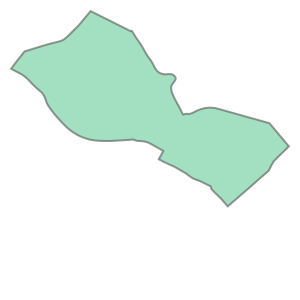

In [64]:
muette = Polygon([(3753224.021406297, 2892487.772495753),(3753868.704495536, 2892165.037845352),(3753886.48740504, 2892171.289378676),(3753886.564439351, 2892171.316454011),(3753886.625381226, 2892171.227665179),(3753890.466974443, 2892165.619478567),(3753897.089432579, 2892155.951883949),(3753901.77997435, 2892149.104680948),(3753907.624230683, 2892140.626482264),(3753909.768643816, 2892137.515663163),(3753922.699810258, 2892114.815169328),(3753937.176209275, 2892091.109203391),(3753953.615838694, 2892065.185996336),(3753966.919086673, 2892045.435183861),(3753981.401866576, 2892024.937210113),(3753996.479394301, 2892003.572465899),(3754007.193021331, 2891987.974969976),(3754022.614935923, 2891965.558534093),(3754036.980212753, 2891943.322064927),(3754049.392746194, 2891922.819523691),(3754062.727478557, 2891900.329472926),(3754081.713738644, 2891867.962394519),(3754087.154692319, 2891857.302825691),(3754102.034657838, 2891829.681045348),(3754117.986571073, 2891802.622109387),(3754123.762108294, 2891793.3658562),(3754143.574314064, 2891762.392080589),(3754143.775676074, 2891762.102823669),(3754144.190706833, 2891761.506741779),(3754157.017432448, 2891743.088368482),(3754157.370734074, 2891742.581251404),(3754162.30590288, 2891735.494335509),(3754166.92678856, 2891729.096051024),(3754184.972137757, 2891705.408928694),(3754188.830697179, 2891700.106130209),(3754201.454427065, 2891681.764575209),(3754205.692919581, 2891675.264725285),(3754214.895497497, 2891660.218305496),(3754224.525837453, 2891642.672988495),(3754235.50625243, 2891620.448752346),(3754246.768960119, 2891598.527003067),(3754248.924322929, 2891594.448515808),(3754259.80798833, 2891575.010832715),(3754263.625496442, 2891568.717108536),(3754275.30617515, 2891550.29229917),(3754277.890713435, 2891546.089434152),(3754282.915992875, 2891538.733112499),(3754284.24137601, 2891536.992642383),(3754288.284143855, 2891531.683004078),(3754291.405294488, 2891527.814978712),(3754295.683828155, 2891522.981879896),(3754300.302017929, 2891518.4239401),(3754305.211120903, 2891514.158811321),(3754310.333919855, 2891510.213114522),(3754313.732263582, 2891507.875250802),(3754320.382612002, 2891503.538076227),(3754326.733176001, 2891499.907137869),(3754340.915900284, 2891491.804641596),(3754345.139604554, 2891489.48174908),(3754349.588008298, 2891487.328054859),(3754352.138012729, 2891486.093539264),(3754359.309597346, 2891483.120433511),(3754366.58559069, 2891480.579595659),(3754369.870927763, 2891479.5925673),(3754375.007530697, 2891478.240148853),(3754387.531216688, 2891475.431417101),(3754402.347762277, 2891472.937317848),(3754417.669844629, 2891471.063215973),(3754422.83750215, 2891470.603576866),(3754442.018378496, 2891471.48550305),(3754461.363766083, 2891473.386808974),(3754476.882360808, 2891474.711573032),(3754482.582011162, 2891475.131453071),(3754490.953329527, 2891475.342829322),(3754497.654932138, 2891475.145208342),(3754506.626705043, 2891474.448959319),(3754515.547546548, 2891473.254790233),(3754518.135021355, 2891472.813424722),(3754521.60739613, 2891472.379599791),(3754527.161584837, 2891471.376386293),(3754532.669370659, 2891470.015549058),(3754538.806098858, 2891468.026113861),(3754542.680939431, 2891466.615029488),(3754546.649365309, 2891464.842417702),(3754552.445562091, 2891461.389224822),(3754558.150043886, 2891457.533104608),(3754563.614270743, 2891453.289538309),(3754568.738759071, 2891448.769916142),(3754570.805648094, 2891446.873954856),(3754574.669535739, 2891442.898781254),(3754578.32780356, 2891438.683818161),(3754580.552541254, 2891435.875319625),(3754583.185987788, 2891432.149676965),(3754585.480875684, 2891428.25793715),(3754586.277971201, 2891426.815932245),(3754588.09387839, 2891423.054863603),(3754589.7066537, 2891419.174695168),(3754590.928499924, 2891415.203727831),(3754591.3667123, 2891413.890502665),(3754592.114228251, 2891410.783576766),(3754592.605999383, 2891407.633475826),(3754592.912752945, 2891404.442851999),(3754592.752212011, 2891400.415951784),(3754592.327767814, 2891396.265337449),(3754591.586482259, 2891392.157636734),(3754590.816461712, 2891389.541442021),(3754589.072463023, 2891384.080562463),(3754586.621681759, 2891378.838088289),(3754584.007161394, 2891373.626729503),(3754581.014585619, 2891369.003271577),(3754573.159285808, 2891356.881387725),(3754556.579046192, 2891333.603883703),(3754539.653966898, 2891310.582376302),(3754535.33581, 2891304.781317966),(3754532.323667532, 2891301.037606203),(3754530.60374775, 2891298.1458885),(3754529.197865371, 2891295.111807585),(3754527.333735107, 2891290.809236184),(3754525.34746156, 2891285.312830478),(3754524.439269404, 2891281.7878151),(3754523.464468715, 2891277.611679852),(3754522.572156314, 2891272.987829103),(3754521.857439692, 2891268.45487271),(3754521.610577814, 2891263.764670434),(3754521.555866636, 2891258.943818411),(3754521.645474613, 2891255.53391021),(3754521.818687615, 2891250.798914849),(3754522.092601971, 2891242.762615598),(3754522.353528778, 2891233.997163977),(3754522.96832355, 2891227.752598098),(3754524.749449584, 2891215.170957114),(3754526.235499388, 2891206.130249304),(3754528.499830408, 2891196.130748044),(3754530.875231178, 2891187.216675961),(3754535.483451348, 2891173.352085751),(3754539.415687361, 2891162.52009962),(3754543.48953609, 2891152.002209692),(3754550.296807825, 2891136.318926286),(3754553.892902602, 2891128.448887937),(3754565.659324373, 2891102.902488886),(3754575.329753947, 2891083.290949882),(3754587.396449499, 2891059.403983461),(3754602.865083868, 2891031.348505719),(3754643.273909612, 2890957.317046698),(3754690.614431764, 2890865.399190722),(3754700.61018241, 2890845.991433213),(3754703.75427637, 2890839.886599405),(3754710.346374017, 2890827.087311262),(3754712.334353222, 2890823.2272802),(3754721.509657416, 2890825.259724179),(3754724.076695714, 2890825.980875609),(3754729.247067372, 2890827.433361921),(3754733.333611319, 2890828.581475215),(3754738.816325917, 2890830.598038111),(3754744.687628787, 2890832.3668644),(3754749.062690315, 2890833.197947285),(3754751.018445585, 2890833.569516979),(3754755.943548411, 2890834.391671605),(3754757.123534889, 2890834.58879459),(3754764.722101134, 2890835.03733165),(3754772.585929424, 2890835.044012185),(3754782.60954592, 2890834.393003596),(3754791.477804514, 2890833.817034528),(3754801.891905955, 2890833.140768103),(3754810.66531555, 2890833.551803839),(3754818.975035979, 2890835.027104628),(3754830.616269762, 2890837.642559782),(3754842.116011527, 2890840.836652859),(3754848.02714697, 2890842.733644238),(3754859.570865205, 2890846.948747253),(3754870.860423864, 2890851.724062424),(3754896.075359947, 2890864.94331038),(3754904.327404315, 2890869.492824762),(3754925.471570588, 2890880.339780629),(3754935.180639928, 2890884.988428254),(3754955.103274147, 2890893.811632082),(3754981.455280938, 2890904.003044961),(3754983.342379052, 2890904.671225126),(3754998.056080211, 2890909.566446106),(3755005.705736563, 2890912.111423295),(3755007.582973232, 2890912.595287764),(3755008.433908158, 2890912.81649421),(3755020.43665851, 2890915.954125932),(3755026.533967099, 2890917.609672812),(3755027.980777032, 2890918.002309203),(3755028.032710155, 2890918.016518638),(3755039.810978942, 2890921.230207167),(3755040.508103447, 2890921.4203556),(3755057.793837912, 2890925.287768228),(3755067.065166183, 2890927.008239838),(3755068.230479295, 2890927.224468415),(3755078.389112468, 2890928.983420853),(3755093.640393515, 2890931.247580439),(3755111.534795324, 2890933.108984306),(3755129.538998192, 2890934.174857886),(3755147.530927765, 2890934.43672678),(3755157.369074157, 2890934.253020188),(3755178.509680609, 2890933.371057798),(3755196.81605402, 2890931.889511969),(3755203.121823261, 2890931.095704211),(3755209.405768091, 2890930.304697792),(3755216.160144445, 2890929.454514865),(3755224.87662658, 2890928.036519063),(3755229.136901652, 2890927.343268151),(3755231.741511968, 2890926.878874838),(3755245.84242812, 2890924.364273567),(3755398.716945364, 2890881.918352001),(3755412.558343988, 2890878.058395227),(3755699.483489751, 2890797.405852765),(3755708.133172488, 2890794.974734316),(3756038.826536125, 2890702.03667513),(3756070.126386045, 2890693.24010877),(3756091.669409853, 2890687.185662352),(3756100.455180747, 2890684.451913261),(3756101.597759858, 2890684.057556431),(3756145.081114942, 2890632.475466663),(3756204.560003825, 2890561.624950549),(3756216.657829513, 2890547.221209726),(3756233.084947233, 2890527.663000919),(3756335.109053511, 2890406.192510099),(3756414.790015688, 2890311.324185351),(3756400.469324657, 2890298.506455594),(3756382.594874877, 2890281.312026314),(3756382.517411869, 2890281.232214975),(3756357.177713629, 2890255.106551296),(3756241.497737256, 2890142.867818165),(3756183.159689767, 2890084.481061602),(3756177.078263727, 2890077.280059384),(3756172.869908905, 2890071.694837558),(3756167.034796171, 2890063.17011112),(3756164.392086868, 2890058.80881468),(3756160.459610884, 2890052.318921415),(3756159.329194305, 2890050.40460879),(3756147.940166744, 2890030.457310981),(3756135.230215894, 2890008.196932445),(3756125.297740667, 2889989.533896661),(3756112.371709042, 2889965.245821728),(3756090.956014648, 2889921.570939118),(3756080.415464067, 2889911.795026814),(3756075.269173271, 2889907.02206872),(3756054.120622878, 2889888.642587264),(3756049.450744175, 2889884.597782222),(3756047.363029956, 2889882.789413919),(3756044.812172755, 2889880.541022796),(3756042.617022797, 2889878.629787855),(3756042.486618929, 2889878.516462032),(3756036.68962034, 2889873.475603074),(3756034.53494592, 2889871.601995328),(3755919.497251135, 2889771.570773394),(3755913.338001049, 2889766.116588159),(3755913.274922965, 2889766.06062591),(3755900.519341749, 2889754.765317902),(3755824.282148821, 2889687.138306144),(3755787.113100581, 2889654.167127511),(3755733.390135809, 2889607.789096735),(3755676.912467707, 2889559.032886385),(3755664.2464804, 2889548.164136703),(3755660.293221455, 2889544.726096517),(3755657.944365712, 2889542.683268608),(3755656.571469095, 2889541.489175624),(3755651.773525685, 2889537.316446838),(3755627.720122023, 2889516.390365466),(3755505.703172424, 2889410.741323577),(3755442.570799412, 2889356.077739276),(3755431.028914239, 2889346.084104869),(3755337.804647906, 2889454.01619932),(3755331.550968657, 2889460.443400553),(3755168.276010955, 2889623.19504205),(3755159.264004615, 2889666.758236806),(3754969.219267581, 2889759.393062861),(3754960.75014817, 2889760.5399871),(3754871.932763455, 2889795.102541671),(3754807.204626911, 2889838.407616771),(3754773.800590429, 2889865.481119069),(3754761.081849923, 2889875.074074064),(3754751.788794053, 2889880.56560844),(3754706.785959167, 2889906.611853687),(3754662.049705079, 2889932.175335363),(3754573.922187911, 2889982.635250474),(3754479.507064837, 2890025.743278231),(3754392.408002418, 2890065.928228307),(3754378.377018242, 2890073.87805538),(3754362.857013618, 2890082.499731579),(3754334.224188844, 2890097.590160942),(3754320.924006096, 2890104.697651062),(3754394.598780082, 2890238.340346283),(3754276.173200361, 2890304.727916613),(3754217.384651125, 2890337.385387704),(3754193.806269456, 2890350.63409849),(3754183.206828448, 2890356.488304946),(3754171.045475166, 2890362.503774046),(3754153.816382339, 2890370.234964944),(3754136.57758116, 2890377.117770248),(3754118.263628468, 2890382.854397494),(3754101.412457141, 2890387.066946703),(3754092.901640499, 2890388.881652582),(3754082.881390467, 2890390.497730695),(3754074.416171853, 2890391.702603289),(3754065.160446318, 2890392.812456634),(3754049.959700459, 2890394.437154234),(3754030.376080463, 2890396.235978711),(3754013.252369646, 2890397.102375652),(3754002.864177178, 2890397.548849029),(3753988.937492797, 2890398.791664715),(3753981.574346399, 2890399.668074557),(3753972.761565835, 2890400.944760844),(3753963.486039955, 2890402.554121332),(3753954.047460504, 2890404.953185054),(3753943.489332284, 2890408.512125431),(3753928.084997561, 2890413.905039871),(3753912.88323145, 2890420.00175746),(3753907.509247933, 2890422.388066506),(3753906.395562208, 2890422.882716925),(3753901.526014905, 2890422.286865787),(3753857.362401271, 2890416.882987191),(3753796.188825449, 2890411.840266736),(3753708.240825527, 2890407.439858483),(3753629.28411245, 2890402.8757463),(3753555.157199132, 2890398.363905784),(3753515.360797331, 2890397.50845251),(3753473.9873095, 2890397.561035213),(3753431.77096548, 2890398.444856503),(3753397.321951203, 2890399.073930064),(3753353.401259296, 2890401.436553571),(3753325.217511276, 2890403.454364817),(3753301.14807895, 2890405.785038294),(3753274.437383667, 2890409.506707006),(3753253.253310017, 2890412.836225651),(3753232.125696398, 2890416.717226578),(3753209.806810069, 2890421.651625942),(3753179.268273361, 2890429.675044853),(3753159.411226373, 2890435.095206751),(3753133.043280177, 2890443.983085698),(3753104.528592061, 2890453.652609808),(3753074.97297819, 2890465.84633289),(3753045.840887329, 2890478.553048394),(3753018.549227936, 2890492.925285112),(3752992.340202986, 2890506.998356781),(3752965.438774554, 2890523.373446075),(3752939.125751029, 2890540.058501828),(3752923.156072725, 2890550.831743954),(3752904.036343031, 2890565.278542838),(3752887.33663372, 2890577.985882012),(3752859.073550156, 2890601.005861647),(3752829.609060162, 2890628.610233588),(3752803.298954642, 2890654.398633184),(3752777.760798211, 2890680.477847992),(3752755.164604546, 2890703.978419497),(3752714.480137298, 2890748.975993134),(3752677.970493957, 2890789.749873019),(3752647.275873541, 2890825.286024492),(3752622.391117582, 2890855.941592998),(3752604.248832748, 2890879.947166685),(3752581.896949749, 2890909.966335468),(3752567.290634613, 2890930.443806069),(3752552.232980861, 2890953.119399858),(3752537.451087646, 2890976.787503178),(3752528.997912659, 2890991.202487494),(3752527.850508569, 2890993.27320339),(3752520.252311712, 2891006.985166945),(3752520.01642241, 2891007.502420561),(3752516.586375444, 2891016.128591545),(3752513.736234158, 2891024.911124587),(3752511.256143889, 2891033.328668733),(3752509.014059234, 2891040.089516253),(3752507.154817874, 2891045.015689171),(3752500.958072741, 2891064.10105624),(3752493.992638538, 2891082.043068741),(3752488.518338454, 2891096.239564282),(3752479.051207147, 2891116.80910272),(3752473.013229632, 2891127.882820958),(3752467.111597, 2891138.697652061),(3752461.038689894, 2891148.632976783),(3752457.544153776, 2891154.301196346),(3752454.337286638, 2891158.797095628),(3752449.377090747, 2891165.271272896),(3752443.869125442, 2891171.965780454),(3752436.984198419, 2891179.538440685),(3752427.03786517, 2891188.2471764),(3752408.180830781, 2891203.842921278),(3752389.220494073, 2891220.020685371),(3752359.76781506, 2891245.943118006),(3752322.295298022, 2891280.291217665),(3752296.404433973, 2891305.188730218),(3752264.544032589, 2891339.439482576),(3752235.264063669, 2891370.238892918),(3752213.855452724, 2891391.159573624),(3752188.8681482, 2891414.267297975),(3752173.658465826, 2891426.542612046),(3752158.417838062, 2891438.515914888),(3752143.989677431, 2891449.488406386),(3752123.867673243, 2891464.414325683),(3752078.721155443, 2891488.547807385),(3751945.48284603, 2891559.210777923),(3751975.731960581, 2891601.548895881),(3752033.787193677, 2891678.002671543),(3752161.695215255, 2891839.375036241),(3752192.384904474, 2891848.818215495),(3752450.736734782, 2891928.315491826),(3752562.297449212, 2891960.563438135),(3752714.608307202, 2891998.8721412),(3752721.05706844, 2892000.485871306),(3752726.57551726, 2892001.978232518),(3752732.066959232, 2892003.566878145),(3752737.529736929, 2892005.251263812),(3752742.962112131, 2892007.031053998),(3752748.362508219, 2892008.905495517),(3752753.72905942, 2892010.873963526),(3752759.060434862, 2892012.936183833),(3752763.970062956, 2892015.074531149),(3752766.847234404, 2892016.408947897),(3752769.700588982, 2892017.793402856),(3752772.5292933, 2892019.227574044),(3752775.332523327, 2892020.711239095),(3752778.109290091, 2892022.243487841),(3752780.858869066, 2892023.824088353),(3752783.580327358, 2892025.452728205),(3752791.132712175, 2892030.25865365),(3752795.17291668, 2892032.972639969),(3752799.164819007, 2892035.75711244),(3752803.107520321, 2892038.611051682),(3752806.999932167, 2892041.533557101),(3752810.840449885, 2892044.523576637),(3752825.044794801, 2892055.720187399),(3752832.549821092, 2892061.94613862),(3752839.94491086, 2892068.302582332),(3752847.227958634, 2892074.787408853),(3752854.396488999, 2892081.398845609),(3752861.448595466, 2892088.13476379),(3753032.652577591, 2892257.756236542),(3753224.021406297, 2892487.772495753)])
muette

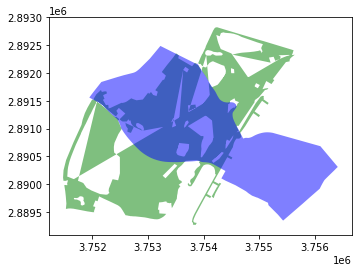

In [65]:
# Plot the two polygons
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=["green", "blue"])
plt.show()

# # Calculate the intersection of both polygons
# intersection = park_boulogne.intersection(muette)

# # Plot the intersection
# geopandas.GeoSeries([intersection]).plot()
# plt.show()

# # Print proportion of district area that occupied park
# print(intersection.area / muette.area)

In [66]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
# https://gis.stackexchange.com/a/166684
countries.crs.axis_info[0].unit_name

'degree'

In [68]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
africa = countries.loc[countries["CONTINENT"]=="Africa"]
africa.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
13,Admin-0 country,0,2,Ethiopia,ETH,0,2,Sovereign country,Ethiopia,ETH,0,Ethiopia,ETH,0,Ethiopia,ETH,0,Ethiopia,Ethiopia,ETH,Ethiopia,None,Eth.,ET,Federal Democratic Republic of Ethiopia,None,Ethiopia,None,None,Ethiopia,None,4,4,1,13,105350020,17,174700.0,2017,2007,2016,7. Least developed region,5. Low income,-99,ET,ET,ETH,ETH,231,231,ET,ETH,23424808,23424808,Exact WOE match as country,ETH,ETH,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,4,-99,1,0.0,2.0,7.0,1159320617,Q115,إثيوبيا,ইথিওপিয়া,Äthiopien,Ethiopia,Etiopía,Éthiopie,Αιθιοπία,इथियोपिया,Etiópia,Ethiopia,Etiopia,エチオピア,에티오피아,Ethiopië,Etiopia,Etiópia,Эфиопия,Etiopien,Etiyopya,Ethiopia,埃塞俄比亚,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
14,Admin-0 country,0,3,South Sudan,SDS,0,2,Sovereign country,South Sudan,SDS,0,South Sudan,SDS,0,South Sudan,SDS,0,S. Sudan,South Sudan,SDS,S. Sudan,None,S. Sud.,SS,Republic of South Sudan,None,South Sudan,None,None,South Sudan,None,1,3,3,5,13026129,14,20880.0,2017,2008,2016,7. Least developed region,5. Low income,-99,-99,SS,SSD,SSD,728,728,SS,SSD,-99,-99,"Includes states of 20069899, 20069897, 2006989...",SSD,SDS,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,11,7,-99,1,0.0,3.0,8.0,1159321235,Q958,جنوب السودان,দক্ষিণ সুদান,Südsudan,South Sudan,Sudán del Sur,Soudan du Sud,Νότιο Σουδάν,दक्षिण सूडान,Dél-Szudán,Sudan Selatan,Sudan del Sud,南スーダン,남수단,Zuid-Soedan,Sudan Południowy,Sudão do Sul,Южный Судан,Sydsudan,Güney Sudan,Nam Sudan,南苏丹,"POLYGON ((35.92084 4.61933, 35.85654 4.61960, ..."
15,Admin-0 country,0,6,Somalia,SOM,0,2,Sovereign country,Somalia,SOM,0,Somalia,SOM,0,Somalia,SOM,0,Somalia,Somalia,SOM,Somalia,None,Som.,SO,Federal Republic of Somalia,None,Somalia,None,None,Somalia,None,2,8,6,7,7531386,13,4719.0,2017,1987,2016,7. Least developed region,5. Low income,-99,SO,SO,SOM,SOM,706,706,SO,SOM,-90,23424949,"Includes Somaliland (2347021, 2347020, 2347017...",SOM,SOM,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,7,7,4,-99,1,0.0,4.0,9.0,1159321261,Q1045,الصومال,সোমালিয়া,Somalia,Somalia,Somalia,Somalie,Σομαλία,सोमालिया,Szomália,Somalia,Somalia,ソマリア,소말리아,Somalië,Somalia,Somália,Сомали,Somalia,Somali,Somalia,索马里,"POLYGON ((46.46696 6.53829, 46.48805 6.55864, ..."
16,Admin-0 country,0,2,Kenya,KEN,0,2,Sovereign country,Kenya,KEN,0,Kenya,KEN,0,Kenya,KEN,0,Kenya,Kenya,KEN,Kenya,None,Ken.,KE,Republic of Kenya,None,Kenya,None,None,Kenya,None,5,2,7,3,47615739,15,152700.0,2017,2009,2016,5. Emerging region: G20,5. Low income,-99,KE,KE,KEN,KEN,404,404,KE,KEN,23424863,23424863,Exact WOE match as country,KEN,KEN,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,5,5,4,-99,1,0.0,1.7,6.7,1159320971,Q114,كينيا,কেনিয়া,Kenia,Kenya,Kenia,Kenya,Κένυα,कीनिया,Kenya,Kenya,Kenya,ケニア,케냐,Kenia,Kenia,Quénia,Кения,Kenya,Kenya,Kenya,肯尼亚,"MULTIPOLYGON (((34.38119 4.62016, 34.45967 4.6..."
18,Admin-0 country,0,6,Malawi,MWI,0,2,Sovereign country,Malawi,MWI,0,Malawi,MWI,0,Malawi,MWI,0,Malawi,Malawi,MWI,Malawi,None,Mal.,MW,Republic of Malawi,None,Malawi,None,None,Malawi,None,1,3,4,5,19196246,14,21200.0,2017,2008,2016,7. Least developed region,5. Low income,-99,MI,MW,MWI,MWI,454,454,MW,MWI,23424889,23424889,Exact WOE match 

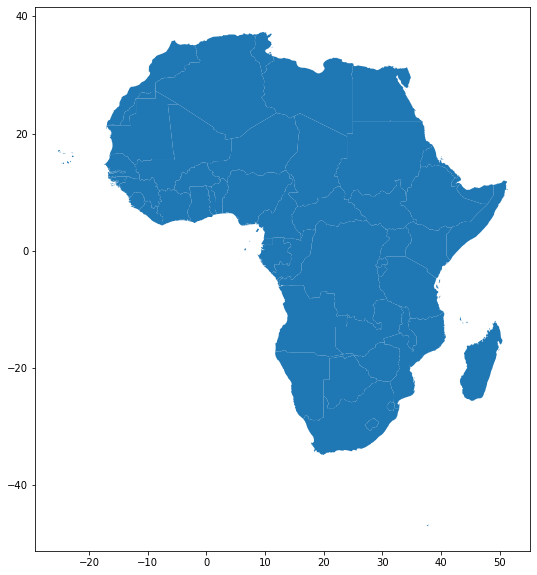

In [71]:
africa["geometry"].plot(figsize=(20,10))
plt.show()

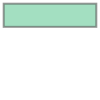

In [72]:
p1 = Point(60, 10)
p2 = Point(60, -10)
p3 = Point(-20, -10)
p4 = Point(-20, 10)
box = Polygon([p1, p2, p3, p4])


box = Polygon([(60, 10), (60, -10), (-20, -10), (-20, 10)])
box

In [73]:
africa.intersection(box)

13     POLYGON ((34.071 9.455, 34.067 9.531, 34.098 9...
14     POLYGON ((35.921 4.619, 35.857 4.620, 35.781 4...
15     POLYGON ((46.467 6.538, 46.488 6.559, 46.508 6...
16     MULTIPOLYGON (((34.381 4.620, 34.460 4.661, 34...
18     POLYGON ((33.315 -10.000, 33.329 -9.965, 33.35...
19     MULTIPOLYGON (((32.921 -9.408, 32.905 -9.398, ...
21     POLYGON ((48.939 10.000, 48.939 9.901, 48.939 ...
27                                         POLYGON EMPTY
28                                         POLYGON EMPTY
31     POLYGON ((18.626 3.477, 18.635 3.449, 18.642 3...
32     MULTIPOLYGON (((18.626 3.477, 18.593 3.710, 18...
36                                         POLYGON EMPTY
37                                         POLYGON EMPTY
72                                         POLYGON EMPTY
73                                         POLYGON EMPTY
81     POLYGON ((32.921 -9.408, 32.923 -9.466, 32.928...
82     MULTIPOLYGON (((-10.282 8.485, -10.283 8.433, ...
83     POLYGON ((-13.301 9.041,

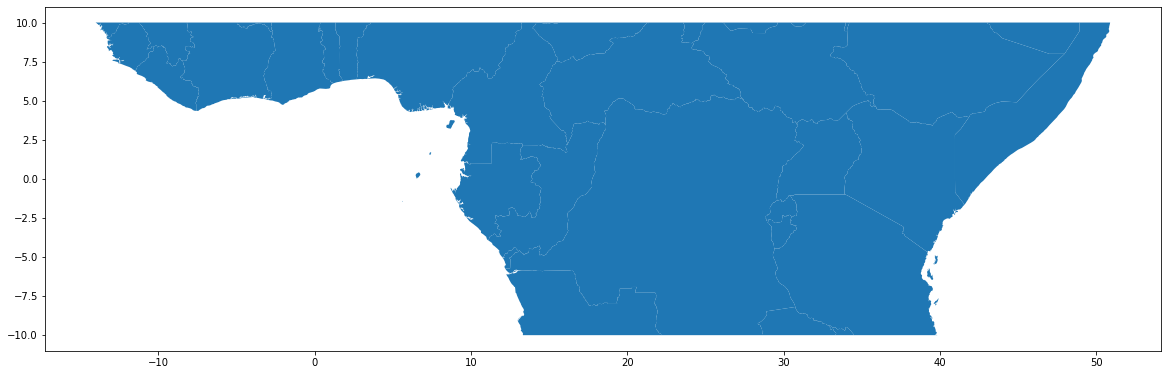

In [74]:
africa_part = africa.intersection(box).copy()
africa_part = africa_part[africa_part.geometry!=Polygon()]
africa_part.plot(figsize=(20,10))
plt.show()

## C4. Introduction to the dataset

,visit_date,name,n_workers,mineral,geometry
0,2013-03-27,Mayi-Tatu,150.0,Gold,POINT (29.66033 1.01089)
1,2013-03-27,Mabanga,115.0,Gold,POINT (29.65862 1.00308)
2,2013-03-27,Molende,130.0,Gold,POINT (29.65629 0.98563)
3,2013-03-27,Embouchure,135.0,Gold,POINT (29.64494 0.99976)
4,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,Gold,POINT (29.66000 0.95600)


epsg:4326


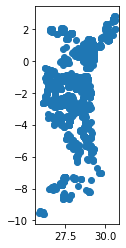

In [75]:
# Read the mining site data
mining_sites = geopandas.read_file("data/ipis_cod_mines.geojson")

# Print the first rows and the CRS information
display(mining_sites.head())
print(mining_sites.crs)

# Make a quick visualisation
mining_sites.plot()
plt.show()

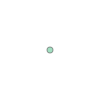

In [76]:
goma = Point((746989.5594829298, 9816380.942287602))
goma

In [77]:
# goma is a Point
print(type(goma))

# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

# The buffer is a polygon
print(type(goma_buffer))

# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print(mask.sum())

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>
0


In [78]:
# Writing a Shapefile file
africa_part.to_file("africa_part.shp", driver='ESRI Shapefile')

# Writing a GeoJSON file
africa_part.to_file("africa_part.geojson", driver='GeoJSON')

# Writing a GeoPackage file
africa_part.to_file("africa_part.gpkg", driver='GPKG')

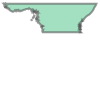

In [79]:
africa_part.unary_union

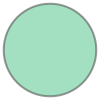

In [80]:
p.buffer(1)

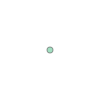

In [81]:
cairo = Point(30.033333, 31.233334)
cairo

In [82]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
rivers = rivers.to_crs(epsg=4087)
rivers = rivers.to_crs(epsg=3857)
# rivers = rivers.to_crs(epsg=4326)

In [84]:
rivers.head(2)

,scalerank,featurecla,name,dissolve,note,min_zoom,strokeweig,name_alt,name_en,min_label,ne_id,label,wikidataid,name_ar,name_bn,name_de,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,geometry
0,5,River,None,River_untitled_77,_untitled_77,4.7,0.20,None,None,5.7,1159113739,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,"LINESTRING (-8125357.385 5808829.857, -8135067..."
1,5,River,Ebro,RiverEbro,None,4.7,0.15,None,Ebro,5.7,1159112595,Ebro,Q10965,أبرة,None,Ebro,Ebro,Èbre,Έβρος,None,Ebro,Ebro,Ebro,エブロ川,에브로 강,Ebro,Ebro,Rio Ebro,Эбро,Ebro,Ebro,Ebro,埃布羅河,4,"LINESTRING (-466301.788 5313672.708, -456660.4..."


In [85]:
rivers.head(2)

,scalerank,featurecla,name,dissolve,note,min_zoom,strokeweig,name_alt,name_en,min_label,ne_id,label,wikidataid,name_ar,name_bn,name_de,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,geometry
0,5,River,None,River_untitled_77,_untitled_77,4.7,0.20,None,None,5.7,1159113739,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,"LINESTRING (-8125357.385 5808829.857, -8135067..."
1,5,River,Ebro,RiverEbro,None,4.7,0.15,None,Ebro,5.7,1159112595,Ebro,Q10965,أبرة,None,Ebro,Ebro,Èbre,Έβρος,None,Ebro,Ebro,Ebro,エブロ川,에브로 강,Ebro,Ebro,Rio Ebro,Эбро,Ebro,Ebro,Ebro,埃布羅河,4,"LINESTRING (-466301.788 5313672.708, -456660.4..."


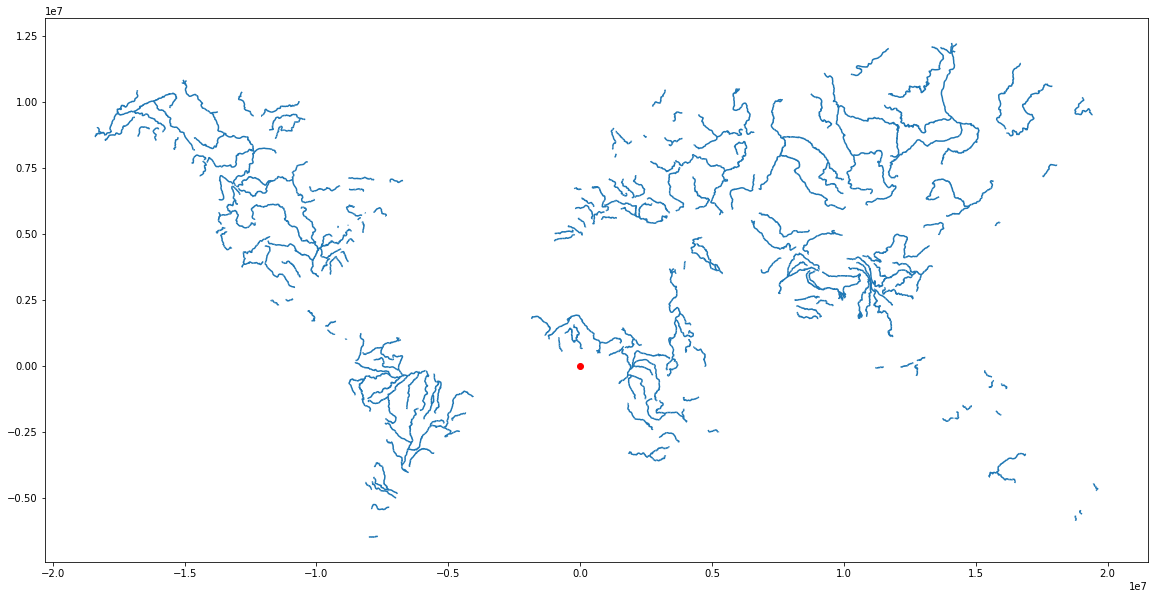

In [86]:
ax = rivers.plot(figsize=(20,10))
geopandas.GeoSeries([cairo]).plot(ax=ax, color="red")
plt.show()

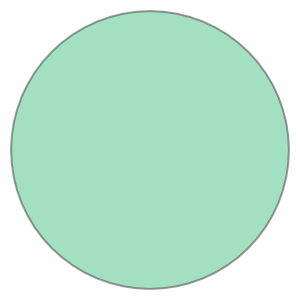

In [87]:
area = cairo.buffer(50000)
area

In [88]:
rivers_within_area = rivers.intersection(area)
rivers_within_area

0       LINESTRING EMPTY
1       LINESTRING EMPTY
2       LINESTRING EMPTY
3       LINESTRING EMPTY
4       LINESTRING EMPTY
              ...       
1612    LINESTRING EMPTY
1613    LINESTRING EMPTY
1614    LINESTRING EMPTY
1615    LINESTRING EMPTY
1616    LINESTRING EMPTY
Length: 1617, dtype: geometry

In [89]:
print(rivers_within_area.length.sum() / 1000)

0.0


In [90]:
def river_length(geom, rivers):
    area = geom.buffer(50000)
    rivers_within_area = rivers.intersection(area)
    return rivers_within_area.length.sum() / 1000

In [91]:
river_length(cairo, rivers)

0.0

In [92]:
cities = cities.to_crs(epsg=3857)

In [93]:
cities['river_length'] = cities.geometry.apply(river_length, rivers=rivers)
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry,river_length
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,None,1.0,0,Vatican (Holy Sea),VAT,Vatican (Holy See),VAT,Lazio,VA,None,41.900012,12.447808,4.0,0,Changed scale rank.,832,832,562430,2,2,6691831.0,None,Vatican City,1,0,636762.0,636762.0,0.0,0.0,0.0,20.0,177.0,177.0,68.0,68.0,160.0,160.0,99.0,99.0,12.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (1386304.649 5146502.576),0.000000
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,None,0.0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.917150,12.466670,0.0,0,None,29579,29000,0,7,7,3168070.0,None,San Marino,1,5,29088.0,29579.0,0.0,0.0,0.0,20.0,30.0,30.0,11.0,11.0,63.0,63.0,39.0,39.0,12.391667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Ville de Saint-Marin,San Marino,Сан-Марино,聖馬力諾,None,سان مارينو المدينة,সান মারিনো,Άγιος Μαρίνος,सानमारिनो,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (1385011.519 5455558.186),0.000000
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,None,0.0,0,Liechtenstein,LIE,Liechtenstein,LIE,None,LI,None,47.133724,9.516669,0.0,0,None,36281,5342,33009,7,5,3042030.0,None,Vaduz,1,0,45442.0,45442.0,0.0,0.0,0.0,20.0,45.0,45.0,17.0,17.0,90.0,90.0,56.0,56.0,9.433333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.7,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都茲,None,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (1059390.800 5963928.576),106.072198
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,Legislative and,0.0,0,Swaziland,SWZ,Swaziland,SWZ,Manzini,SZ,None,-26.466667,31.199997,4.0,0,Changed scale rank.,9782,4557,0,5,4,935048.0,None,Lobamba,1,5,9782.0,9782.0,9782.0,0.0,0.0,50.0,18.0,18.0,7.0,7.0,32.0,32.0,20.0,20.0,31.183333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q101418,421199783,1,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,Лобамба,洛班巴,None,لوبامبا,None,Λομπάμπα,None,Lobamba,Lobamba,Lobamba,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (3473167.791 -3056995.457),0.000000
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,None,0.0,0,Luxembourg,LUX,Luxembourg,LUX,Luxembourg,LU,None,49.611660,6.130003,4.0,0,Changed scale rank.,107260,76684,106219,9,8,2960316.0,None,Luxembourg,1,0,107260.0,107260.0,107260.0,0.0,0.0,50.0,60.0,60.0,23.0,23.0,71.0,71.0,44.0,44.0,6.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.0,Q1842,101751765,0,Luxembourg,Luxemburg,Luxemburgo,Luxembourg,Luxemburgo,Люксембург,盧森堡,None,مدينة لوكسمبورغ,লুক্সেমবুর্গ,Λουξεμβούργ